#Inteligencia Artificial - 2023

Juan Enrique Ayala Gaspar

In [ ]:
#Importamos las bibliotecas necesarias
import tensorflow as tf
import tensorflow_datasets as tfds
from pathlib import Path
import pandas as pd
import numpy as np
import os
from PIL import Image
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

# **Red Neuronal para clasificar imágenes**
En este código diseñamos un perceptrón multicapa para clasificar imágenes en blanco y negro para predecir  manos mostrándo los números del 0 al 5

In [ ]:
#Importamos Kaggle para poder descargar el dataset directamente de la página, ya que pesa mucho
!pip install kaggle


In [ ]:
#importamos la biblioteca google.colab para poder conectarnos a nuestro drive y subir archivos a este collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


En Settings de kaggle nos vamos a la parte de Account

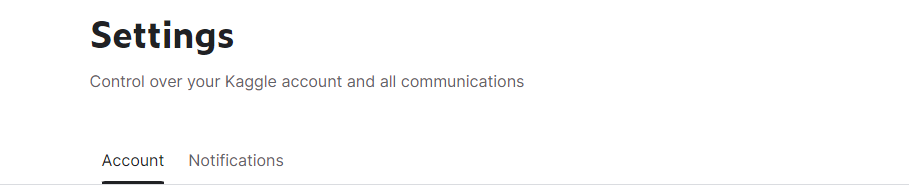

Utilizamos la API de Kaggle y descargamos nuestro archivo Kaggle.json dándole en crear new token
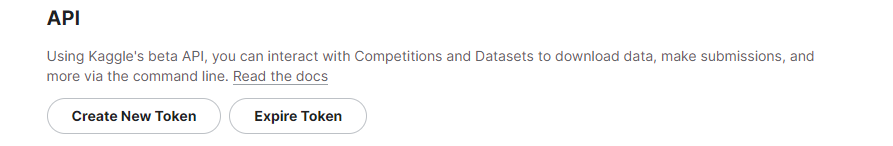


In [ ]:
from google.colab import files

# Subimos el archivo kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
#Cambiamos de lugar nuestro Kaggle.json para poder descargar archivos

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#Este código descarga el dataset que vamos a usar directamente de la página de kaggle

!kaggle datasets download -d roshea6/finger-digits-05

 37% 7.00M/19.0M [00:00<00:00, 70.4MB/s]
100% 19.0M/19.0M [00:00<00:00, 109MB/s] 


In [ ]:
#Descomprimimos el dataset
!unzip -q finger-digits-05.zip -d fingers_dataset



#Preprocesamiento de los datos

In [ ]:
#Almacenamos las rutas de la carpeta que contiene todas las imagenes

path = 'fingers_dataset/training_images (copy)'

#Las imágenes son de 128 x 128 pixeles
imgTam = 128

#Almacenamos las clases de las imágenes
clases = ['0', '1','2','3','4','5']

El datset se obtuvo del siguiente link de kaggle: [https://www.kaggle.com/datasets/roshea6/finger-digits-05)
](https://www.kaggle.com/datasets/roshea6/finger-digits-05)

Consta de : 12006 imágenes  

1. Todas las imágenes son de 128 x 128 píxeles.


Son imágenes png donde el último caracter del nombre del archivo, antes del '.png' ;   representa la clase a la que pertenece esa imagen (El numero que la mano de la imagen está haciendo ---> del 0 al 5). En total son 6 clases (números del 0-5), y el dataset contiene 2000 imagenes de cada clase. Posteriormente el dataset se dividirá en conjuntos de entrenamiento, validación, y prueba con porcentajes 70%, 15% y 15% respectivamente.
En ese caso 8404 serán de entrenamiento, 1800 de validación y 1800 de prueba.


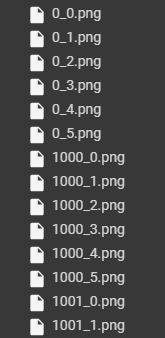

Para extraer estas clases deberemos realizar un preprocesamiento en el nombre de los archivos

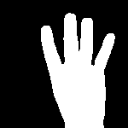


In [ ]:
#Creamos una lista para almacenar todos los datos (imagenes y el indice a sus clases)
datos=[]

"""
data_img es una variable que estoy utilizando en el bucle for para iterar a través de los nombres
de los archivos en el directorio especificado por path. En cada iteración, data_img toma el valor
 de un nombre de archivo en la lista de archivos del directorio."""

for data_img in os.listdir(path):
#Extraemos el ultimo caracter del nombre del archivo
    label_str = data_img[-5]
    #convertimos la etiqueta al indice númerico que accede a esa clase en la lista "clases"
    label= clases.index(label_str)

    #se lee la imagen en escala de grises
    img = cv2.imread(os.path.join(path, data_img), cv2.IMREAD_GRAYSCALE)
    #se redimensiona el tamaño de la imagen a 128 x 128
    img = cv2.resize(img, (imgTam, imgTam))
    #se almacena  la  imagen y su el indice a su etiqueta en , training data
    datos.append([img, label])


In [ ]:
#vemos que tenemos 12006 imagenes en total
len(datos)

12006

In [ ]:
len(datos[0][0])

128

In [ ]:
#La imagen numero 50
datos[49][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

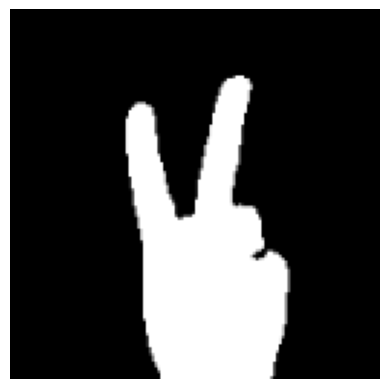


La etiqueta de la imagen 50  es:  2


In [ ]:

# Obtenemos la imagen 50 completa
imagen_completa = datos[49][0]

# Mostramos la imagen
plt.imshow(imagen_completa, cmap='gray')
plt.axis('off')
plt.show()

print("\nLa etiqueta de la imagen 50  es: ", datos[2][1])



In [ ]:
from sklearn.model_selection import train_test_split

# Convertimos la lista de datos en dos listas separadas para las imágenes y las etiquetas
imagenes, etiquetas = zip(*datos)


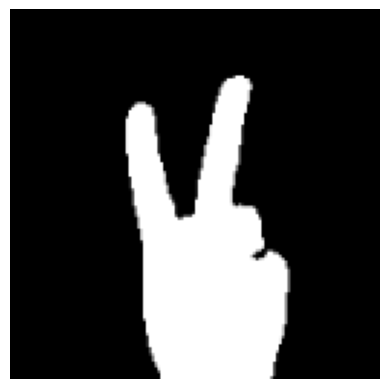


La etiqueta de la imagen 50  es:  2


In [ ]:

# Volvemos  a obtener la imagen 50 completa
imagen_completa2 = imagenes[49]

# Mostramos la imagen
plt.imshow(imagen_completa2, cmap='gray')
plt.axis('off')
plt.show()

print("\nLa etiqueta de la imagen 50  es: ", etiquetas[49])



In [ ]:

# Dividimos en conjuntos de entrenamiento (70%) y prueba + validación (30%)
img_train, img_temp, label_train, label_temp = train_test_split(imagenes, etiquetas, test_size=0.3, random_state=42, stratify=etiquetas)

# Dividimos el conjunto de prueba+validación en conjuntos de prueba (50%) y validación (50%)
img_test, img_val, label_test, label_val = train_test_split(img_temp, label_temp, test_size=0.5, random_state=42, stratify=label_temp)

# Ahora img_train, label_train, img_val, label_val, img_test, label_test contienen
#los conjuntos respectivos para entrenar, validar y probar el modelo


In [ ]:
print ("El numero de imagenes de nuestro conjunto de entrenamiento es: ", len(img_train))
print ("El numero de imagenes de nuestro conjunto de validación es: ", len(img_val))
print ("El numero de imagenes de nuestro conjunto de prueba es: ", len(img_test))

El numero de imagenes de nuestro conjunto de entrenamiento es:  8404
El numero de imagenes de nuestro conjunto de validación es:  1801
El numero de imagenes de nuestro conjunto de prueba es:  1801


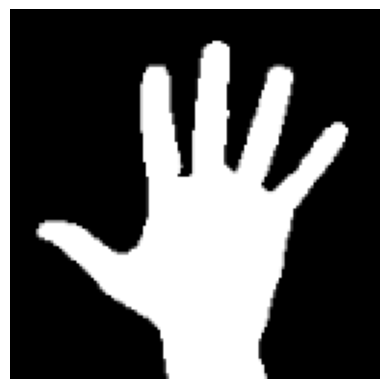


La etiqueta de la imagen 3 de entrenamiento es:  5


In [ ]:

# Obtenemos una imagen del conjunto de entrenamiento
imagen_completa3 = img_train[2]

# Mostramos la imagen
plt.imshow(imagen_completa3, cmap='gray')
plt.axis('off')
plt.show()

print("\nLa etiqueta de la imagen 3 de entrenamiento es: ", label_train[2])

In [ ]:
#Verificamos que las imagenes sean  de 128 x 128 pixeles
img_train[0].shape

(128, 128)

#Imprimimos algunas imagenes del conjunto de entrenamiento

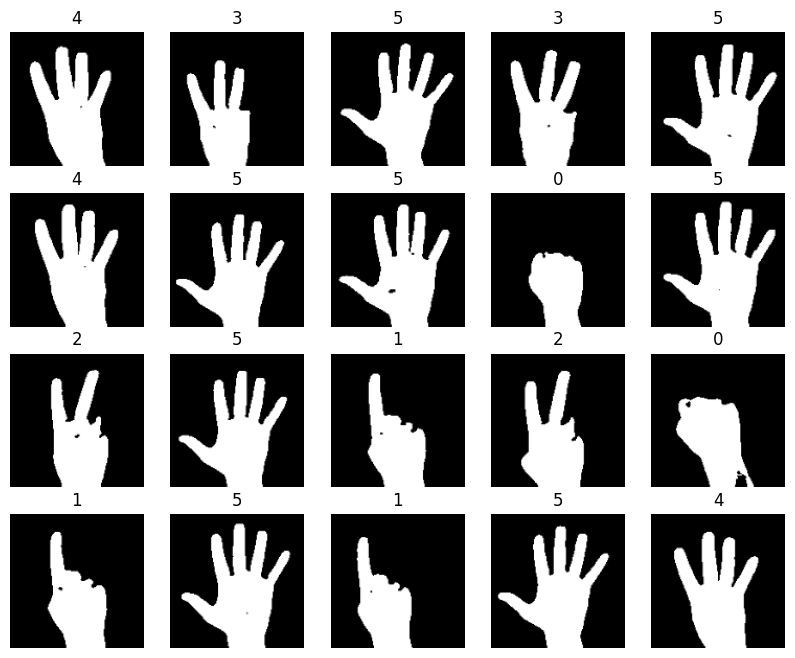

In [ ]:

"""Sabemos que img_train contiene las imagenes de entrenamiento, label_train el indice a las clases
de las imagenes de entrenamiento
y clases es una lista correspondiente a las clases de las imágenes"""

fig, axs = plt.subplots(4, 5, figsize=(10, 8))  # 4 filas, 5 columnas para 20 imágenes


#Mostramos  en pantalla algunas imagenes de los datos de entrenamiento
for i in range(20):
    row = i // 5  # Fila actual
    col = i % 5   # Columna actual

    axs[row, col].imshow(img_train[i], cmap='gray') #Mostramos la imagen

    axs[row, col].axis('off')  # Desactivar ejes para mayor claridad
    axs[row, col].set_title(clases[label_train[i]]) #Imprimimos la clase de la imagen


plt.show()

#Imprimimos algunas imagenes del conjunto de validación

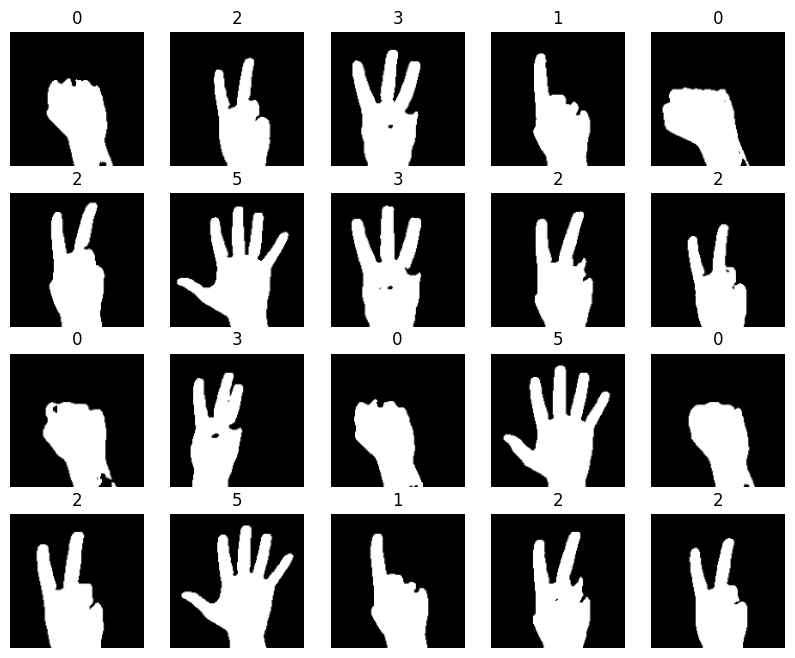

In [ ]:

fig, axs = plt.subplots(4, 5, figsize=(10, 8))  # 4 filas, 5 columnas para 20 imágenes


#Mostramos  en pantalla algunas imagenes de los datos de validacion
for i in range(20):
    row = i // 5  # Fila actual
    col = i % 5   # Columna actual

    axs[row, col].imshow(img_val[i], cmap='gray') #Mostramos la imagen
    axs[row, col].axis('off')  # Desactivar ejes para mayor claridad
    axs[row, col].set_title(clases[label_val[i]]) #Imprimimos  la clase de la imagen

plt.show()

#Imprimimos algunas imagenes del conjunto de prueba

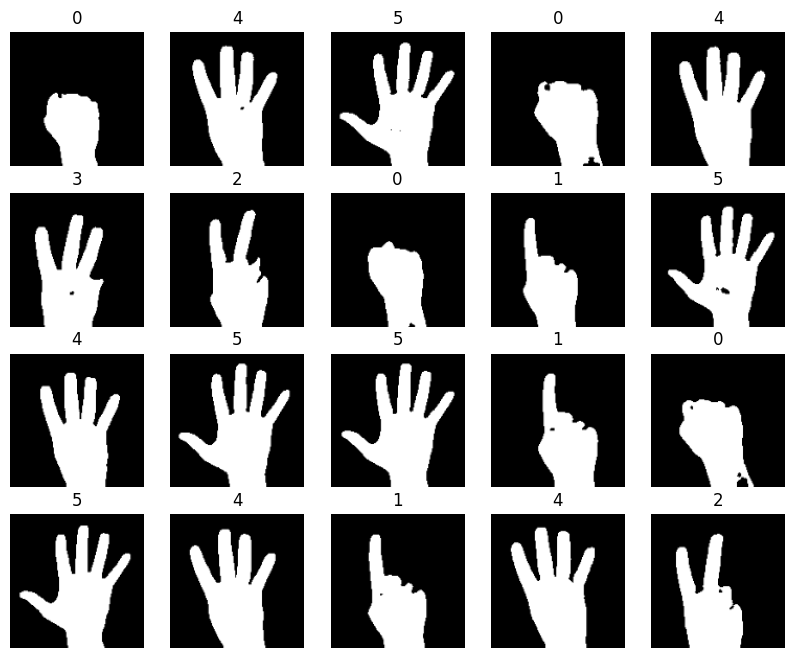

In [ ]:

fig, axs = plt.subplots(4, 5, figsize=(10, 8))  # 4 filas, 5 columnas para 20 imágenes


#Mostramos  en pantalla algunas imagenes de los datos de prueba
for i in range(20):
    row = i // 5  # Fila actual
    col = i % 5   # Columna actual

    axs[row, col].imshow(img_test[i], cmap='gray') #Mostramos la imagen
    axs[row, col].axis('off')  # Desactivar ejes para mayor claridad
    axs[row, col].set_title(clases[label_test[i]]) #Imprimimos  la clase de la imagen

plt.show()

In [ ]:
#Vemos  que son imagenes de 128 x 128 pixeles

print(img_train[0].shape)
print(img_test[0].shape)
print(img_val[0].shape)



(128, 128)
(128, 128)
(128, 128)


# Convertimos los conjuntos de entrenamiento, prueba y validacion a tensores de TensorFlow


In [ ]:
import tensorflow as tf
x_train = tf.convert_to_tensor(img_train, dtype=tf.float32) / 255.0  # Normalizamos las imágenes(valores entre 0 y 1 )
y_train = tf.convert_to_tensor(label_train, dtype=tf.int32)

x_val = tf.convert_to_tensor(img_val, dtype=tf.float32) / 255.0  # Normalizamos las imágenes(valores entre 0 y 1 )
y_val = tf.convert_to_tensor(label_val, dtype=tf.int32)

x_test = tf.convert_to_tensor(img_test, dtype=tf.float32) / 255.0  # Normalizamos las imágenes(valores entre 0 y 1 )
y_test = tf.convert_to_tensor(label_test, dtype=tf.int32)

In [ ]:
#verificamos que se mantenga la forma de las imagenes
print(x_train[0].shape)
print(x_test[0].shape)
print(x_val[0].shape)

(128, 128)
(128, 128)
(128, 128)


In [ ]:
#vemos que ahora estamos trabajando con tensores
x_train[0].shape

TensorShape([128, 128])

In [ ]:
#le agregamos una dimension a las x de entrenamiento, validacion y prueba,
#ya que la entrada de la red que vamos a usar lo requiere
x_train = tf.expand_dims(x_train, axis=-1)
x_val = tf.expand_dims(x_val, axis=-1)
x_test = tf.expand_dims(x_test, axis=-1)


In [ ]:
#verificamosla nueva forma de las imagenes con la dimension extra
print(x_train[0].shape)
print(x_test[0].shape)
print(x_val[0].shape)

(128, 128, 1)
(128, 128, 1)
(128, 128, 1)


#Creación del modelo

#Perceptrón Multicapa (MLP)
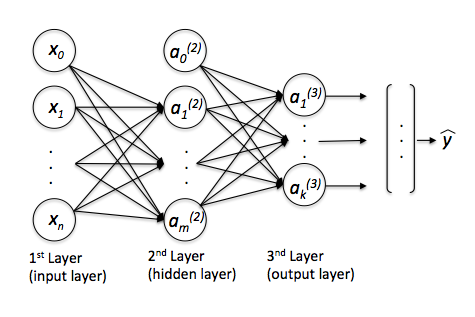

In [ ]:
#Creamos el modelo
modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(128,128,1)), #1 - blanco y negro
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(50, activation=tf.nn.relu),
  tf.keras.layers.Dense(6, activation=tf.nn.softmax) #Funcion de activacion usada
                                                      #para redes de clasificacion  ... hay 6 clases de salida
                                                      #y los valores netos o ponderados de la capa de salida es la
                                                      #probabilidad de que la imagen pertenezca a esa clase

])




In [ ]:
#Compilamos el modelo
modelo.compile(
    optimizer='adam',                                     #utilizamos el optimizador de adam
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #la funcion de perdida es la de crossentropía cruzada
                                                          #que es la que se usa para multiclases
    metrics=['accuracy']
)

In [ ]:
#Imprimimos el numero de datos del conjunto de entrenamiento
print (len(x_train))
print (len(y_train))

8404
8404


In [ ]:
#Imprimimos el numero de datos del conjunto de validacion
print (len(x_val))
print (len(y_val))

1801
1801


In [ ]:
#Imprimimos el numero de datos del conjunto de prueba
print (len(x_test))
print (len(y_test))

1801
1801


In [ ]:
# Convertimos las listas x_train, y_train, x_val, y_val,  x_test, y_test a conjuntos de datos
datos_entrenamiento = tf.data.Dataset.from_tensor_slices((x_train, y_train))
datos_validacion = tf.data.Dataset.from_tensor_slices((x_val, y_val))
datos_pruebas = tf.data.Dataset.from_tensor_slices((x_test, y_test))



In [ ]:
type(datos_entrenamiento)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

In [ ]:
datos_entrenamiento.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>

In [ ]:
#Vamos a entrenar nuestro modelo por lotes
TAMANO_LOTE = 32
num_ej_entrenamiento = len(x_train)

# Shuffle y Repeat para el conjunto de entrenamiento
datos_entrenamiento = datos_entrenamiento.shuffle(buffer_size=num_ej_entrenamiento).repeat().batch(TAMANO_LOTE)

# Batch para el conjunto de validación
datos_validacion = datos_validacion.batch(TAMANO_LOTE)

# Batch para el conjunto de pruebas
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)


In [ ]:
#Imprimimos le numero de ejemplos de validacion
num_ej_validacion=len(x_val)
print(num_ej_validacion)

1801


Primero entrenamos el modelo con los datos de entrenamiento durante 5 épocas

In [ ]:
import math

# Entrenamos el modelo en el conjunto de entrenamiento con validación
historial = modelo.fit(
    datos_entrenamiento,  # Conjunto de entrenamiento
    epochs=5,            # Número de épocas
    steps_per_epoch=math.ceil(num_ej_entrenamiento / TAMANO_LOTE),  # Pasos por época
    validation_data=datos_validacion,  # Conjunto de validación
    validation_steps=math.ceil(num_ej_validacion / TAMANO_LOTE)  # Pasos de validación por época
)


Epoch 1/5
263/263 [==============================] - 10s 29ms/step - loss: 0.1456 - accuracy: 0.9581 - val_loss: 0.0056 - val_accuracy: 0.9994
Epoch 2/5
263/263 [==============================] - 5s 19ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 9.8009e-04 - val_accuracy: 1.0000
Epoch 3/5
263/263 [==============================] - 5s 18ms/step - loss: 8.2940e-04 - accuracy: 1.0000 - val_loss: 5.7394e-04 - val_accuracy: 1.0000
Epoch 4/5
263/263 [==============================] - 7s 27ms/step - loss: 3.9954e-04 - accuracy: 1.0000 - val_loss: 3.1064e-04 - val_accuracy: 1.0000
Epoch 5/5
263/263 [==============================] - 5s 18ms/step - loss: 2.3846e-04 - accuracy: 1.0000 - val_loss: 1.9636e-04 - val_accuracy: 1.0000


Los resultados que se están observando son las métricas de pérdida (loss) y precisión (accuracy) durante el entrenamiento y la validación del modelo en cada época. La pérdida es una medida que indica qué tan bien el modelo realiza la tarea, y se espera que disminuya con el tiempo, acercándose a cero para un mejor rendimiento. La precisión, por otro lado, representa la proporción de predicciones correctas en relación con el total de predicciones, siendo 1.0 (o 100%) el valor ideal que indica que todas las predicciones son correctas.

Durante el entrenamiento, la precisión alcanza un valor cercano a 1.0 después de pocas épocas, lo que sugiere un buen rendimiento del modelo. Además, la pérdida disminuye significativamente, indicando que el modelo está aprendiendo de manera efectiva.

En el caso de la validación, tanto la precisión (val_accuracy) como la pérdida (val_loss) muestran buenos resultados. Esto sugiere que el modelo no solo memoriza los datos de entrenamiento, sino que también generaliza bien, capturando patrones que son aplicables a datos nuevos.

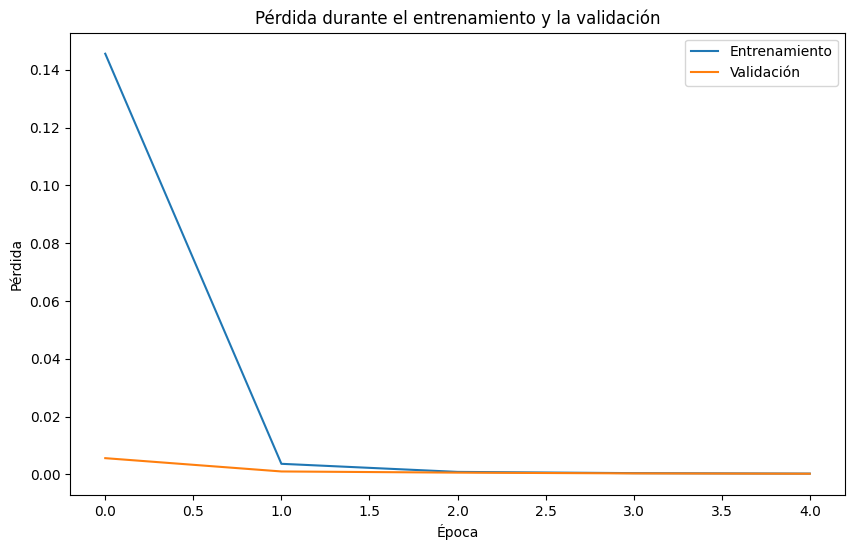

In [ ]:
# Entrenamiento vs. Validación - Pérdida
plt.figure(figsize=(10, 6))
plt.plot(historial.history['loss'], label='Entrenamiento')
plt.plot(historial.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento y la validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [ ]:
# Evaluación en el conjunto de prueba
resultados_prueba = modelo.evaluate(datos_pruebas)

# Imprimimos los resultados
print("Pérdida en el conjunto de prueba:", resultados_prueba[0])
print("Precisión en el conjunto de prueba:", resultados_prueba[1])


57/57 [==============================] - 0s 6ms/step - loss: 3.6329e-04 - accuracy: 1.0000
Pérdida en el conjunto de prueba: 0.00036329132854007185
Precisión en el conjunto de prueba: 1.0


La pérdida en el conjunto de prueba es baja (0.001) y la precisión es alta (aproximadamente 99.94%). Esto indica que el modelo generaliza bien a datos que no ha visto durante el entrenamiento.

#Realizamos algunas predicciones

In [ ]:
datos_pruebas.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

1/1 [==============================] - 0s 130ms/step


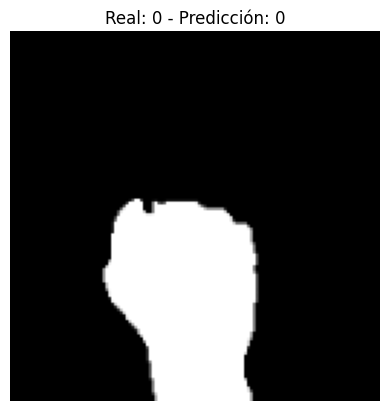

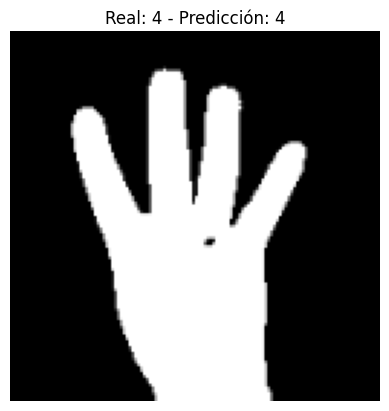

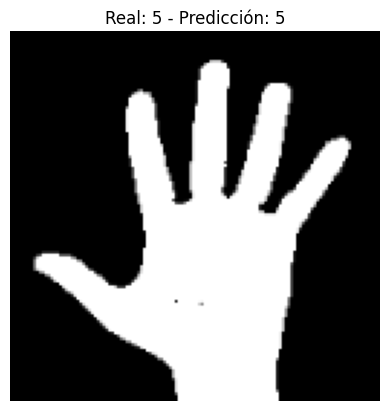

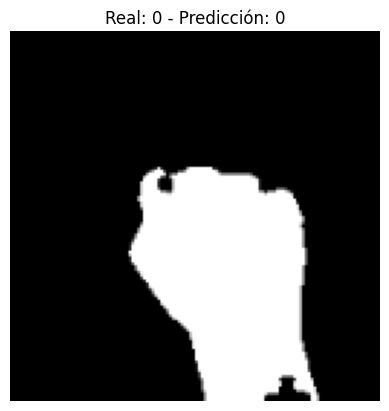

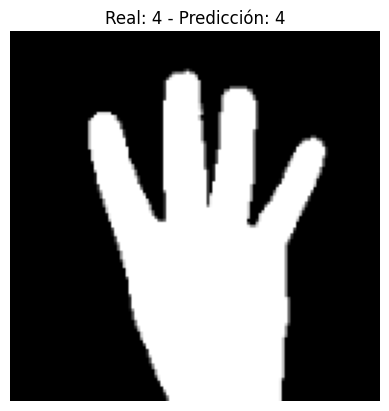

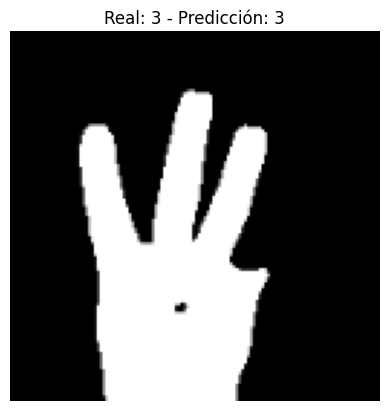

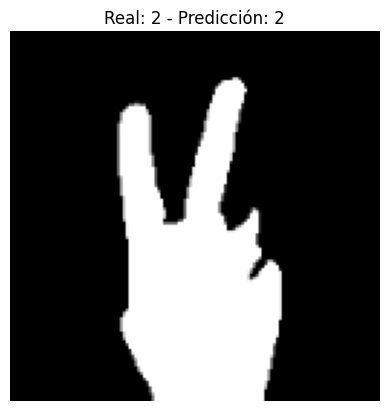

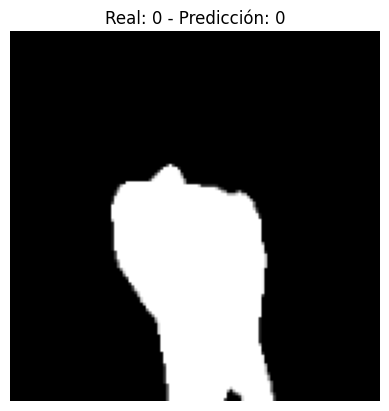

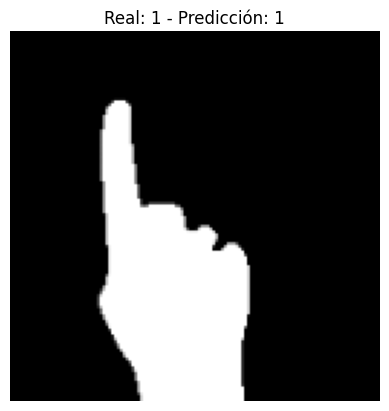

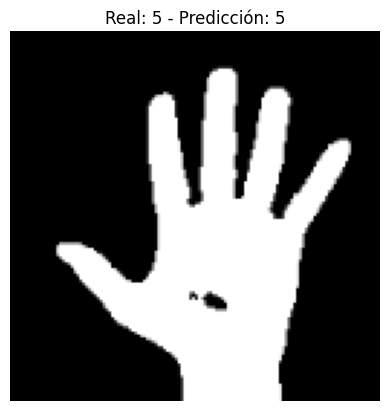

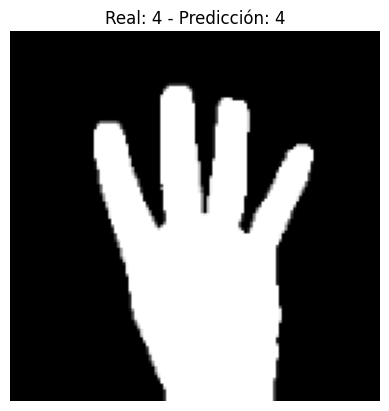

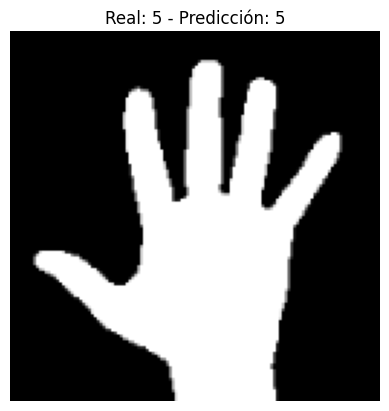

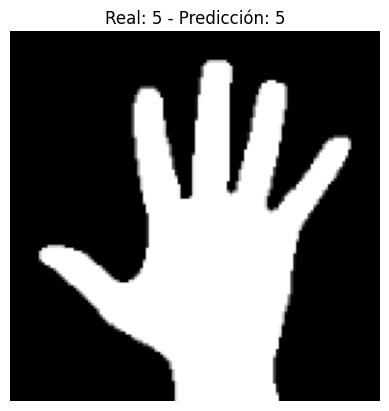

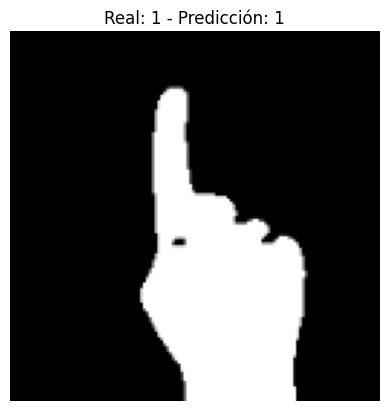

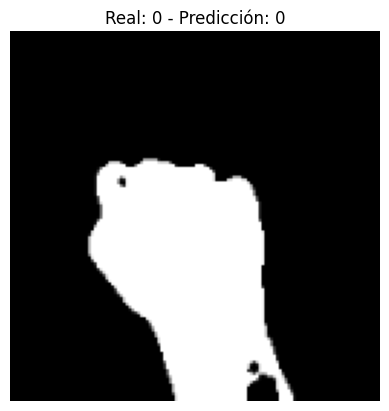

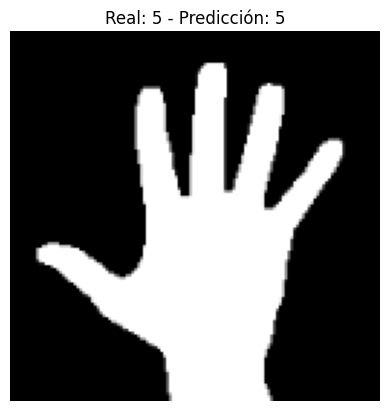

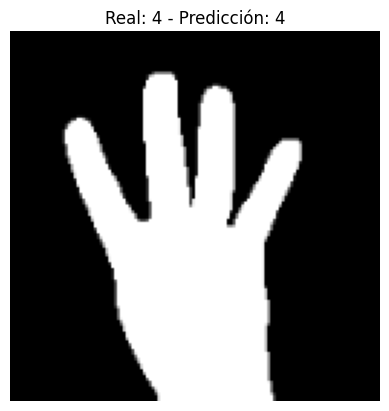

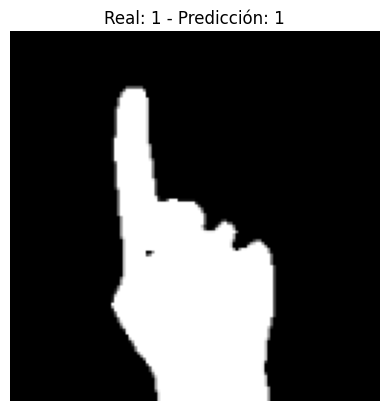

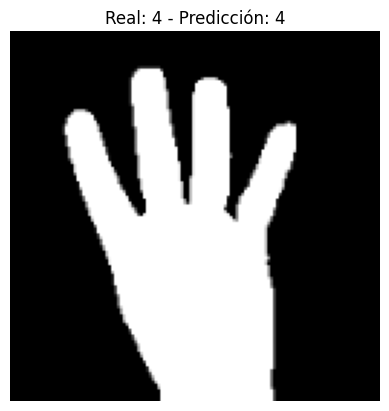

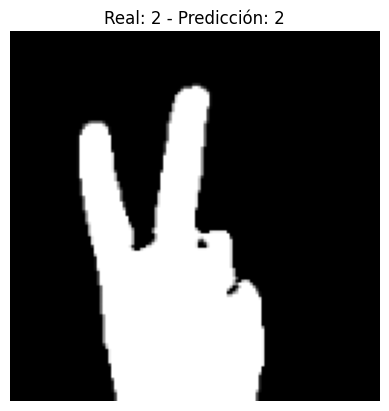

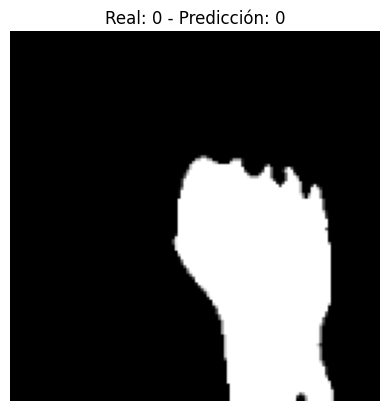

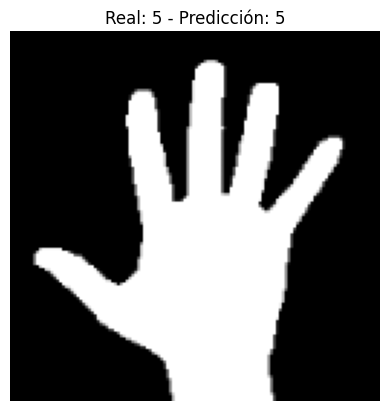

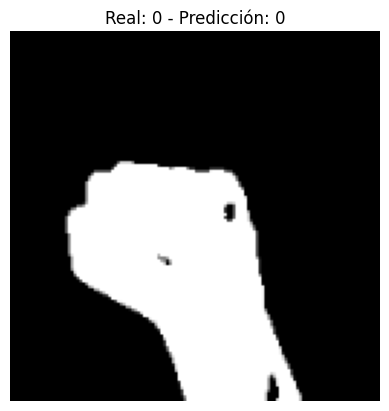

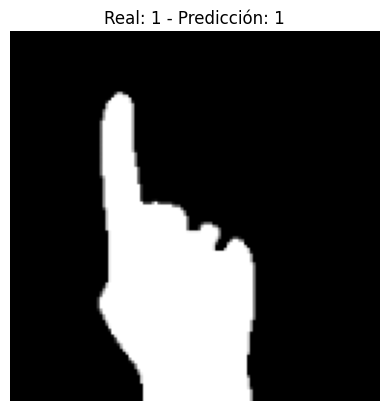

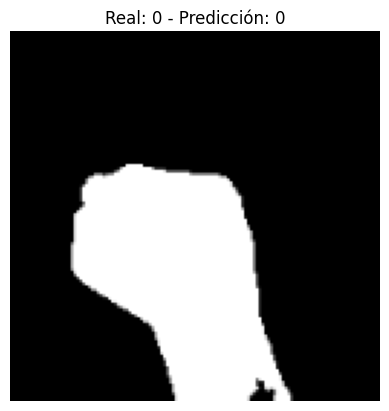

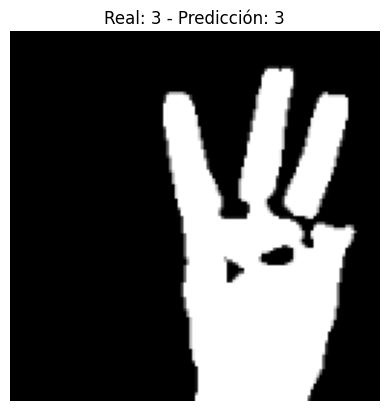

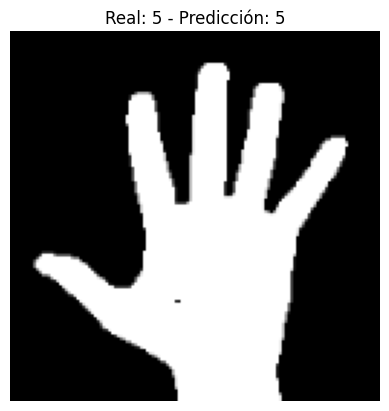

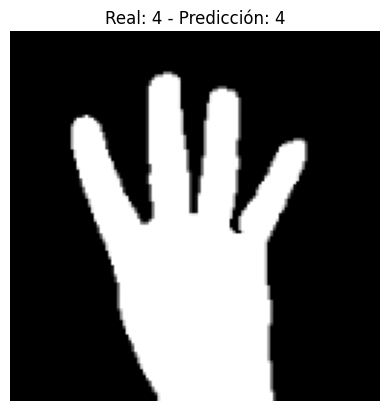

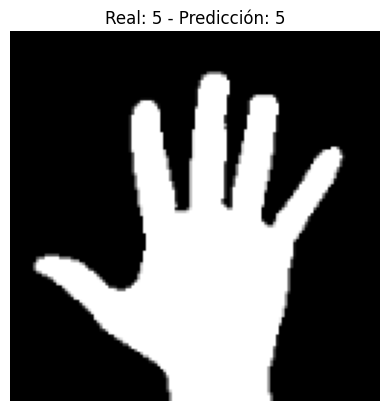

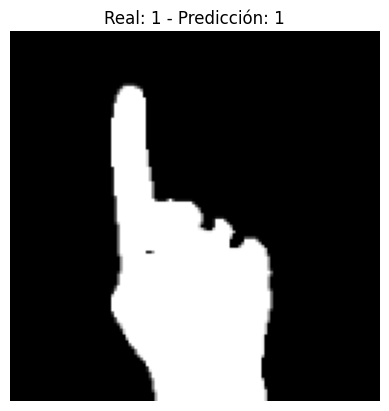

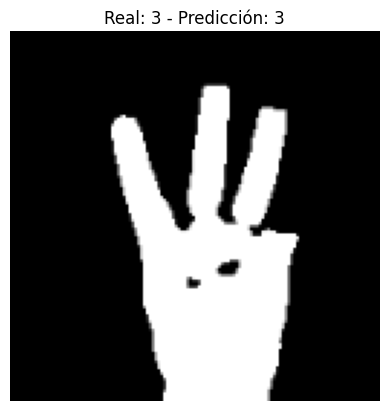

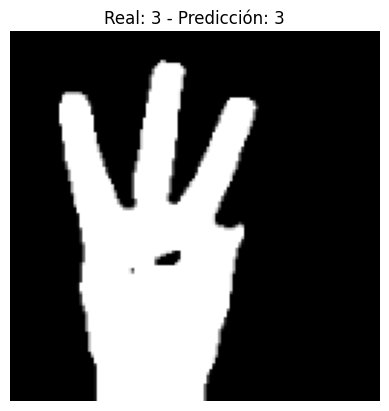

In [ ]:
# Iteramos sobre el conjunto de pruebas para hacer 10 predicciones imagen a imagen
for imagen, etiqueta_real in datos_pruebas.take(1):

    # Realizamos la predicción para la imagen actual
    predicciones = modelo.predict(imagen)

    # Iteramos sobre cada predicción en el lote
    for i in range(predicciones.shape[0]):
        etiqueta_predicha = np.argmax(predicciones[i])
        # Convierte el tensor a un array de NumPy y selecciona una sola imagen
        imagen_np = imagen.numpy()[i, :, :, 0]

        # Mostramos la imagen
        plt.imshow(imagen_np, cmap='gray')
        plt.axis('off')

        # Mostramos valores predichos y reales
        etiqueta_real_np = etiqueta_real.numpy()

        etiqueta_real_int = int(etiqueta_real_np[i]) if etiqueta_real_np.size > 1 else int(etiqueta_real_np)
        plt.title(f'Real: {clases[etiqueta_real_int]} - Predicción: {clases[etiqueta_predicha]}')

        plt.show()


1/1 [==============================] - 0s 51ms/step


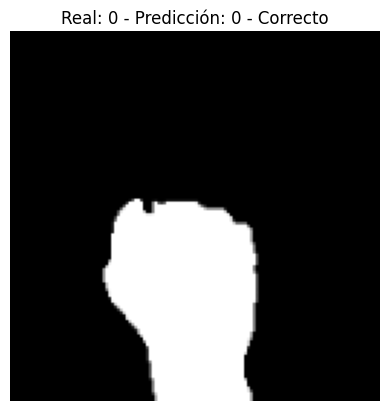

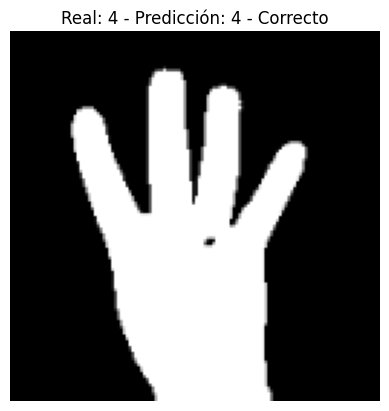

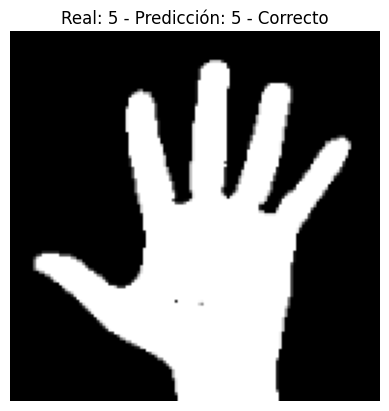

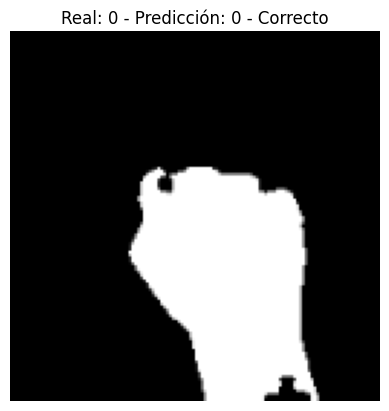

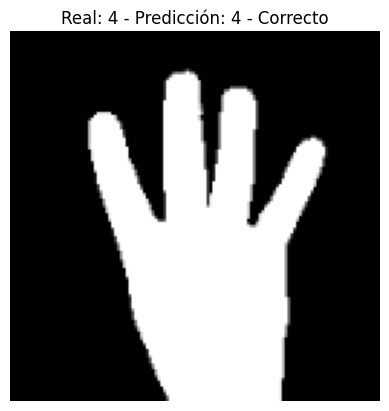

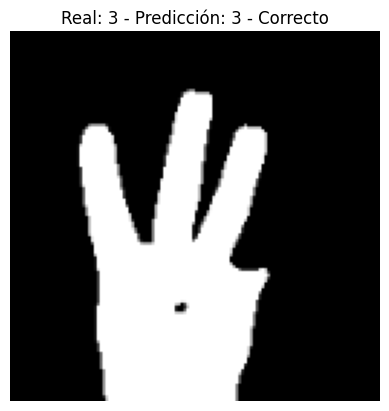

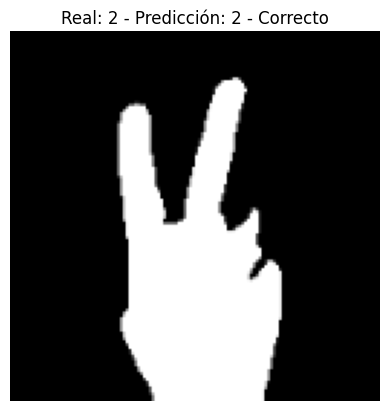

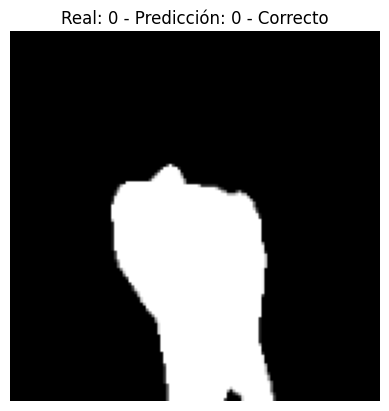

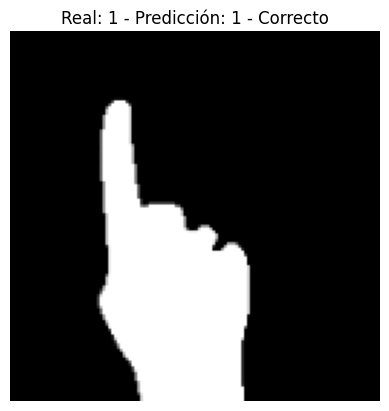

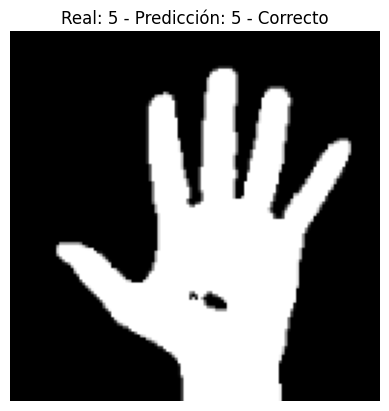

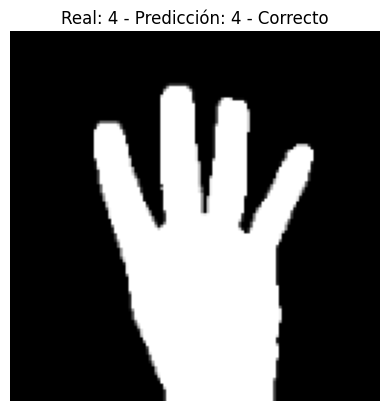

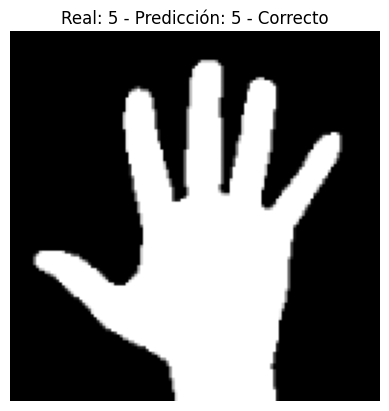

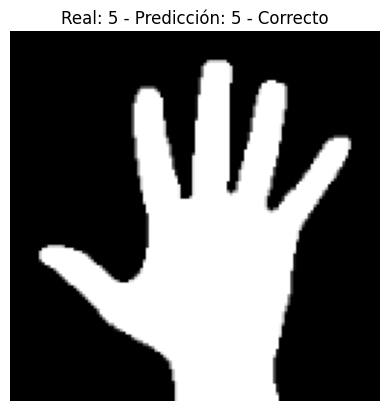

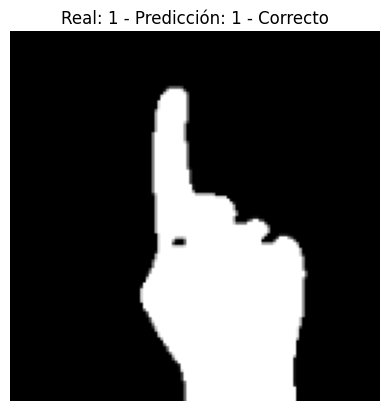

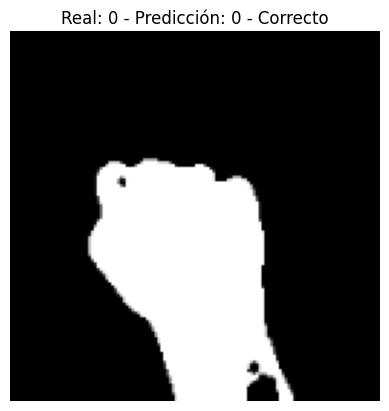

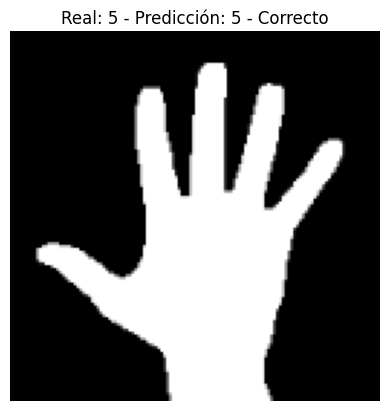

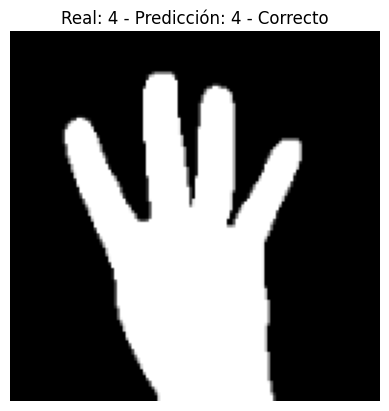

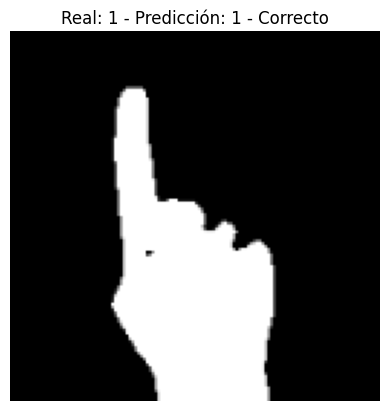

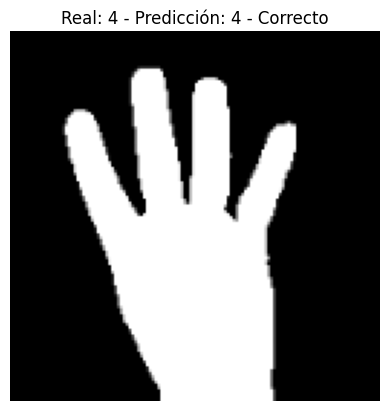

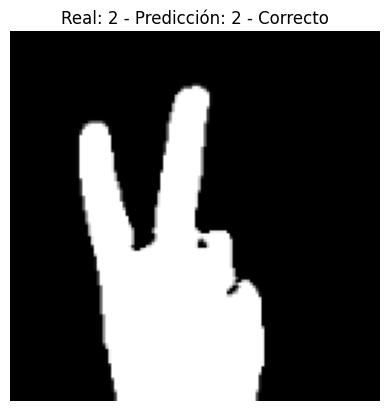

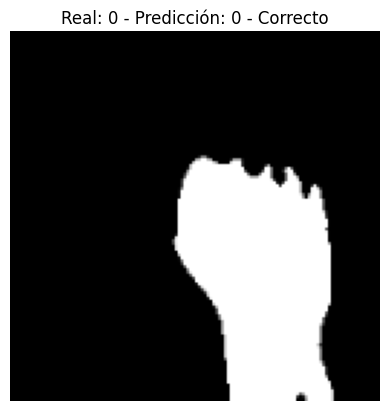

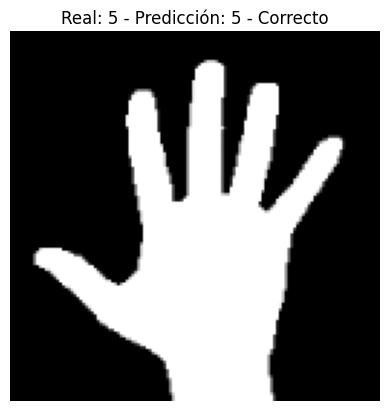

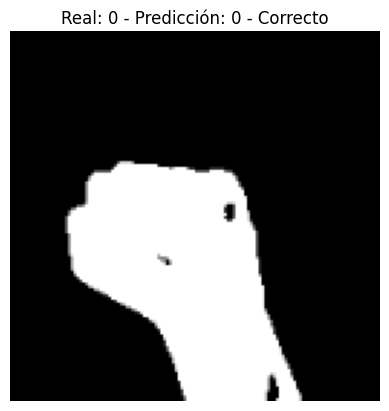

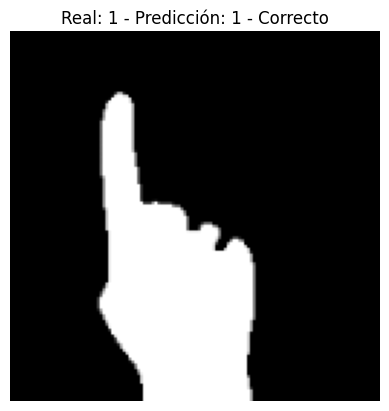

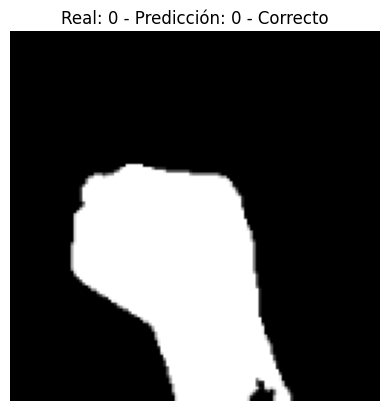

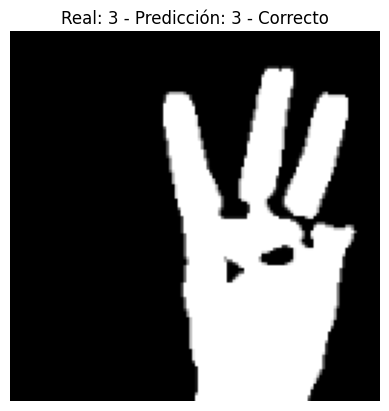

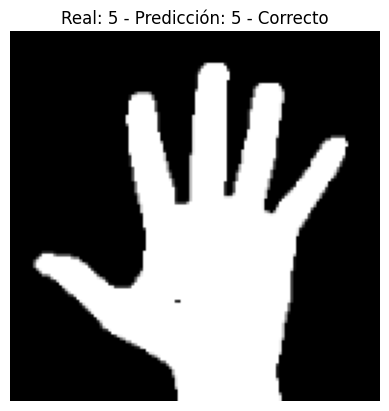

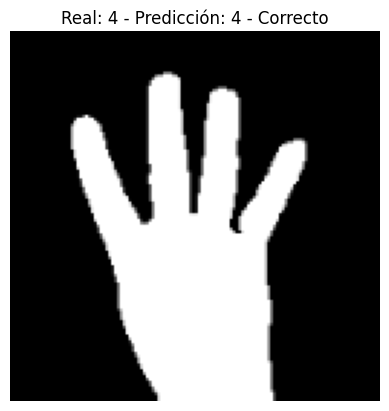

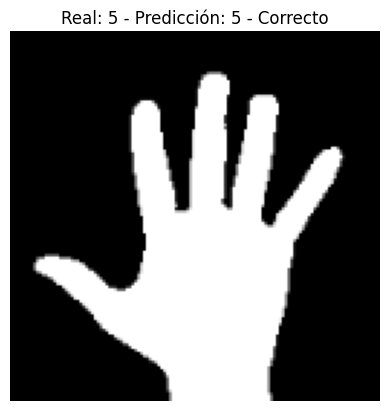

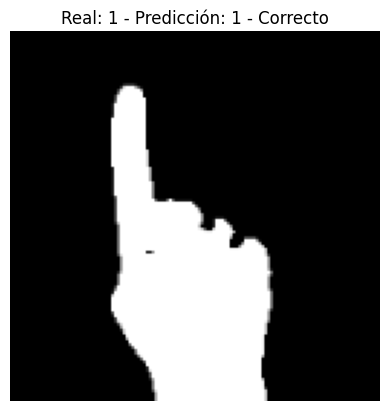

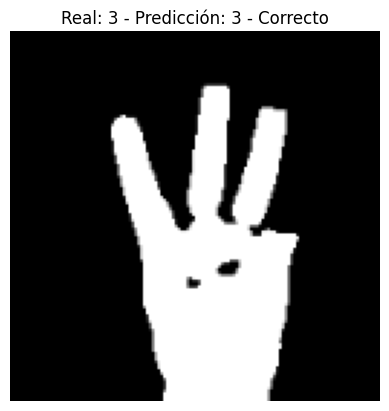

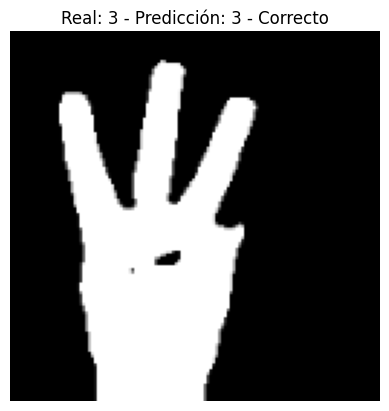

1/1 [==============================] - 0s 30ms/step


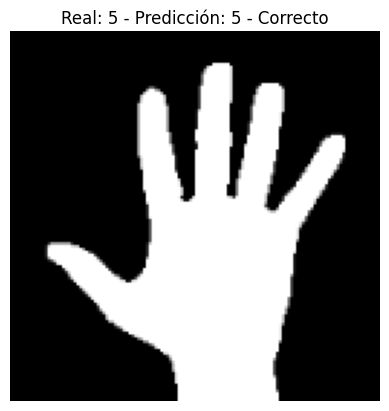

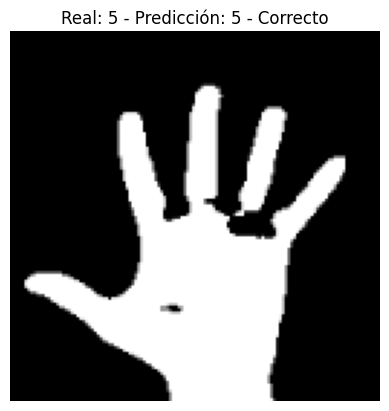

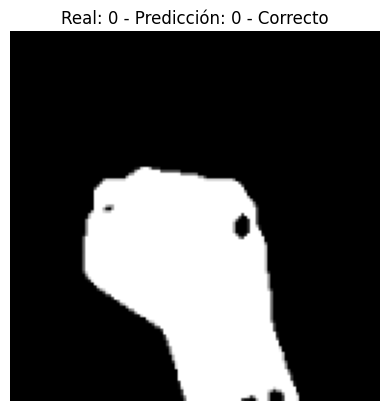

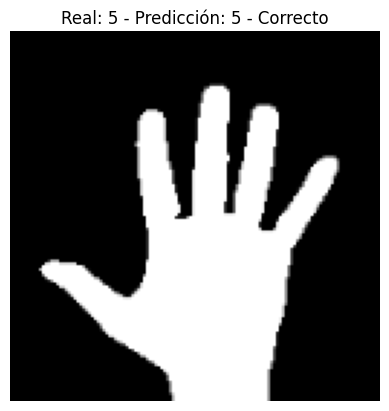

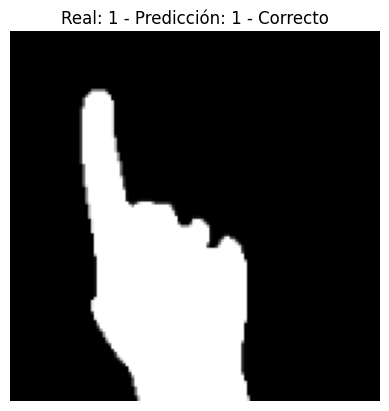

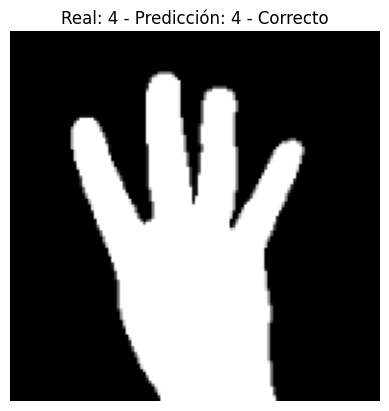

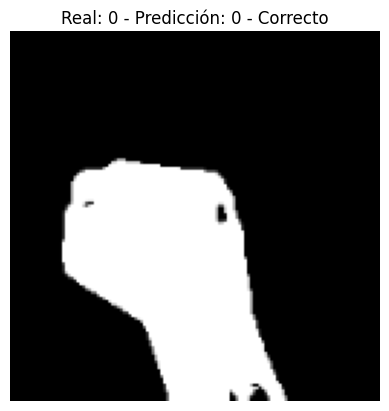

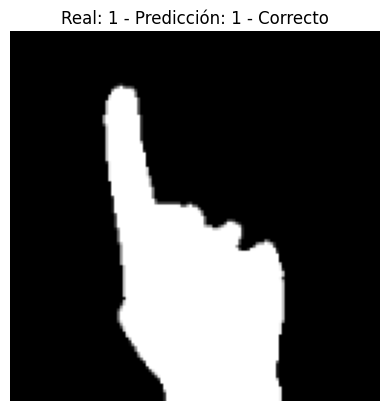

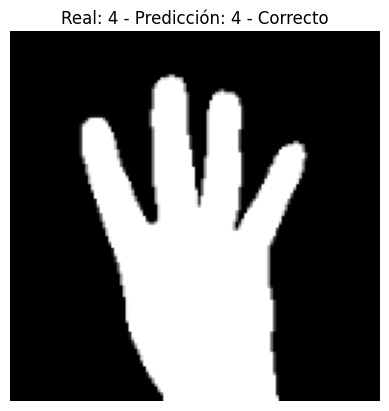

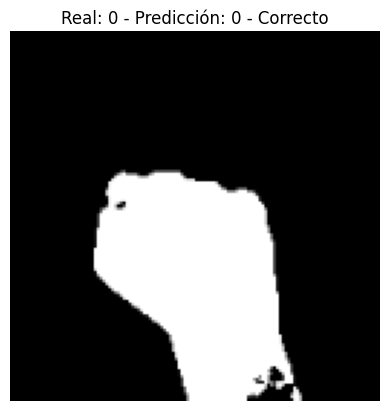

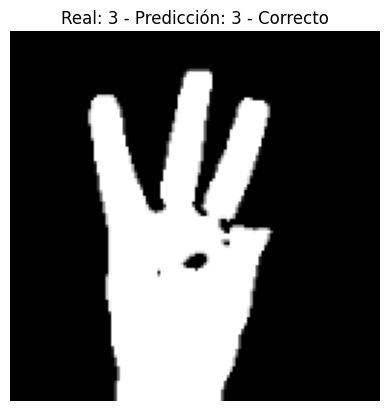

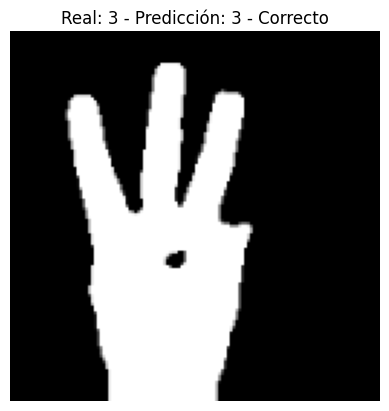

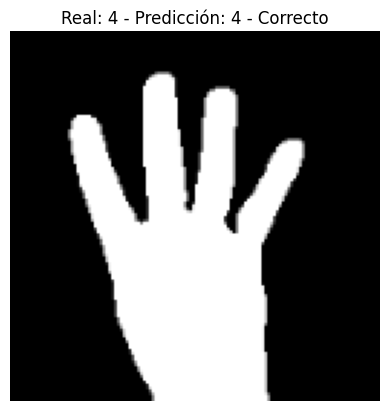

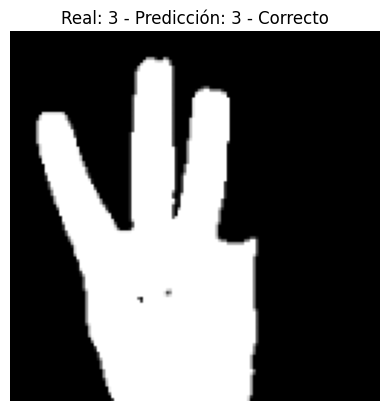

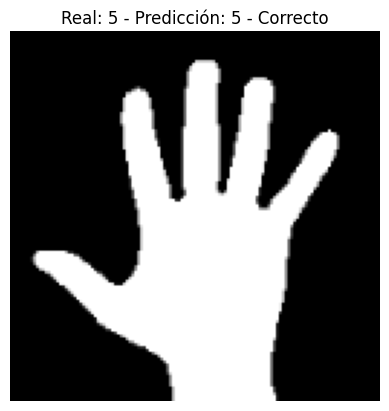

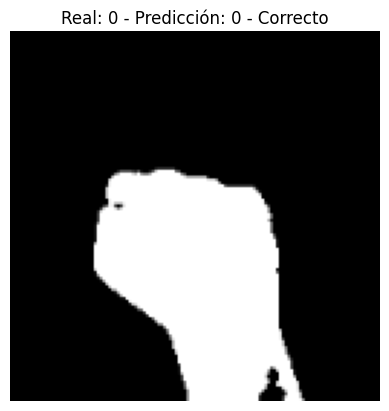

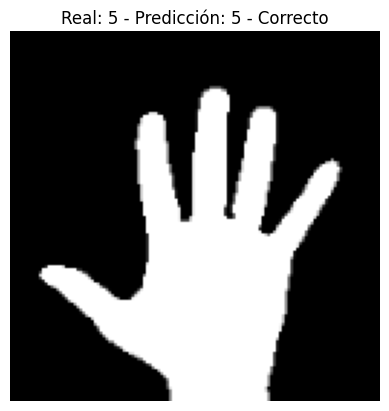

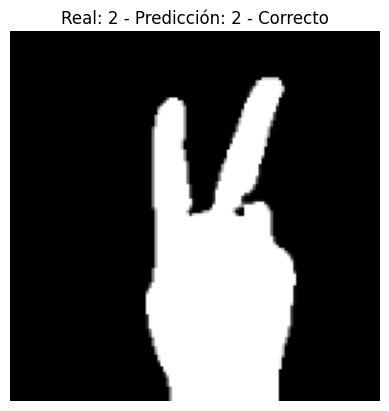

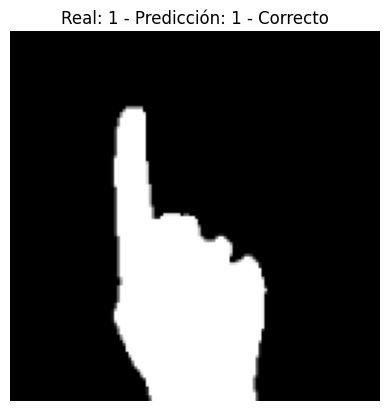

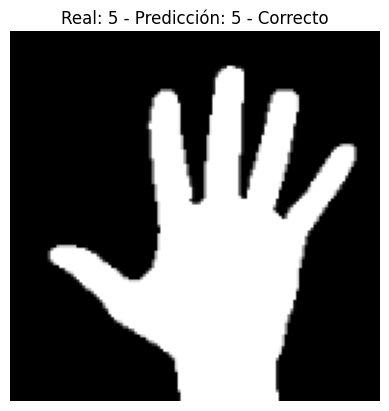

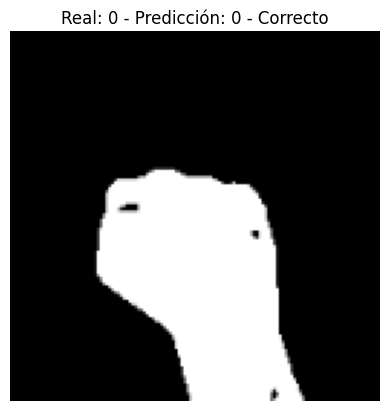

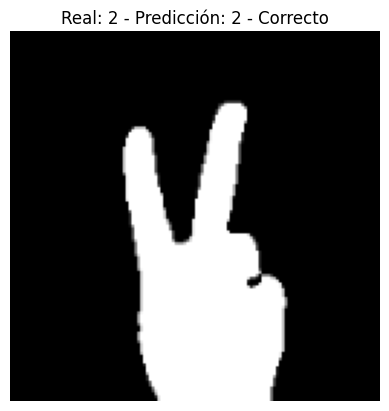

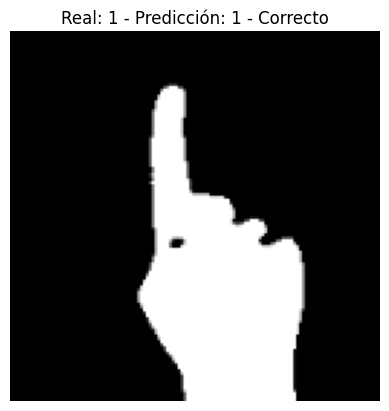

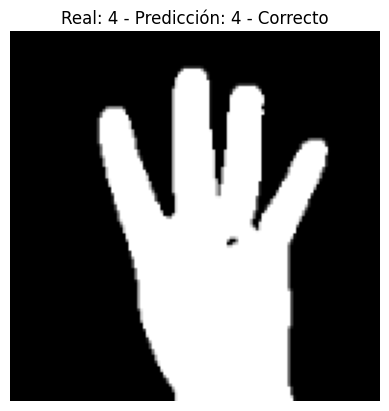

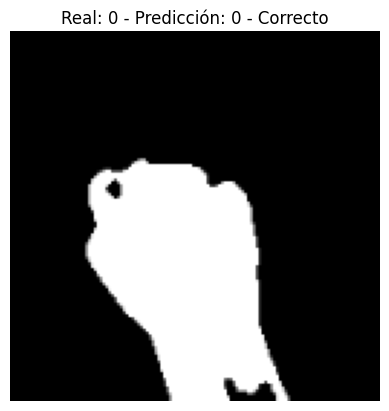

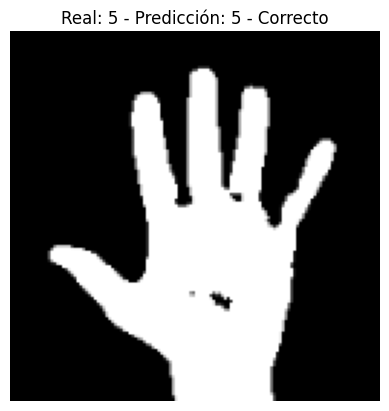

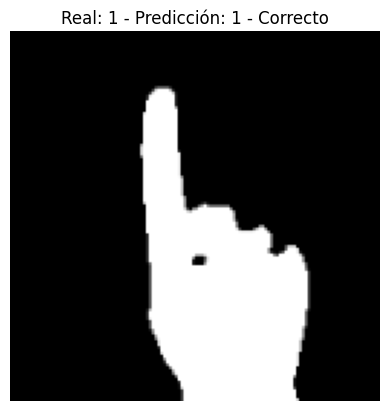

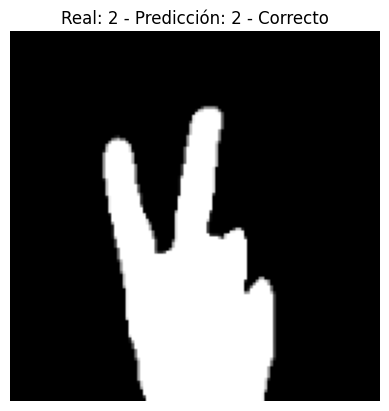

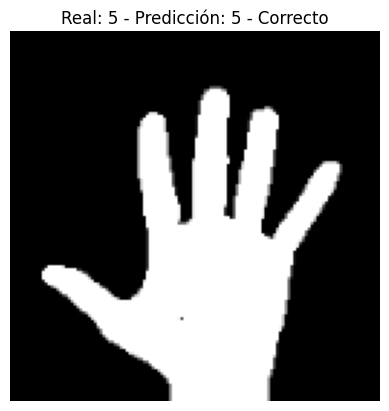

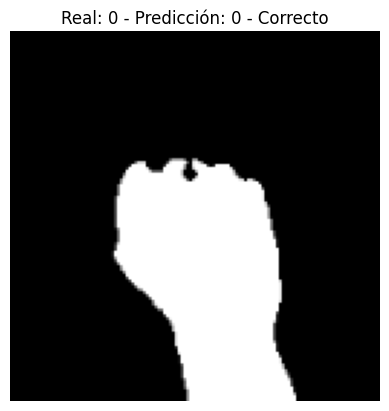

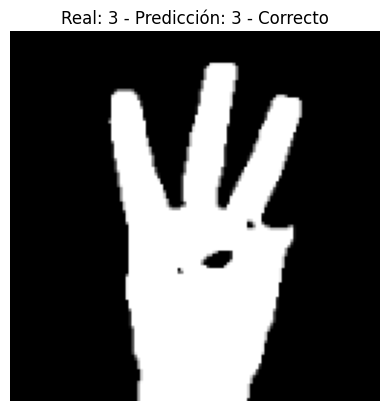

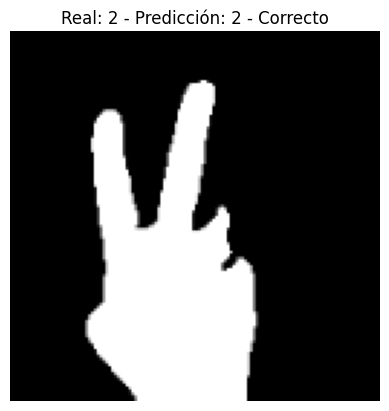

1/1 [==============================] - 0s 42ms/step


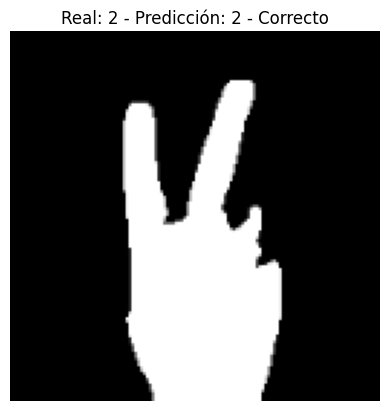

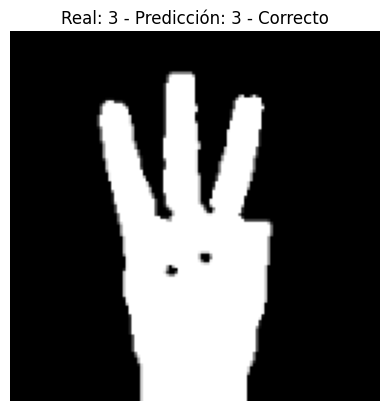

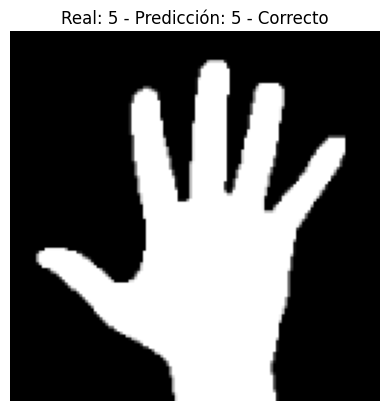

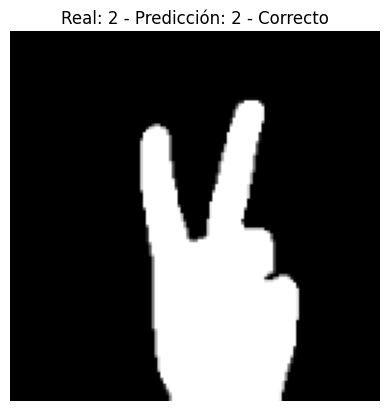

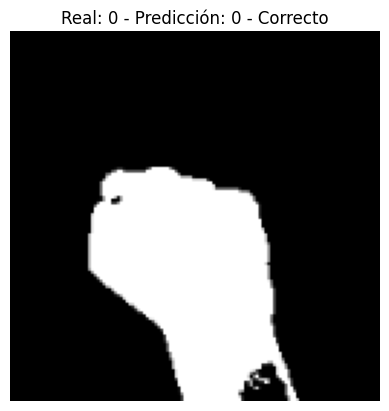

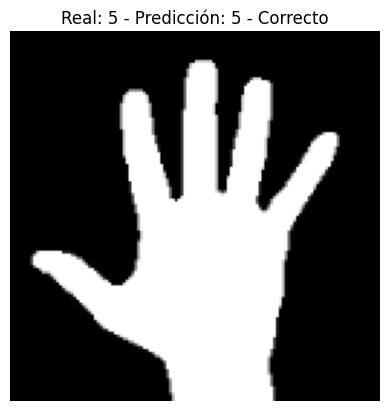

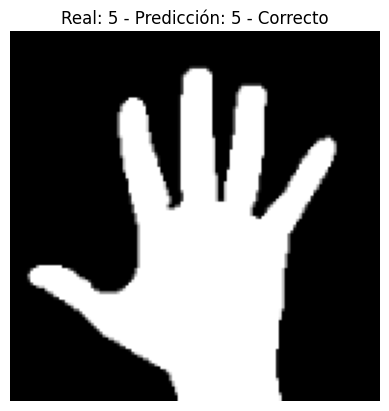

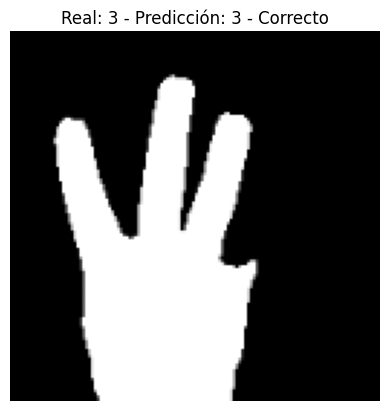

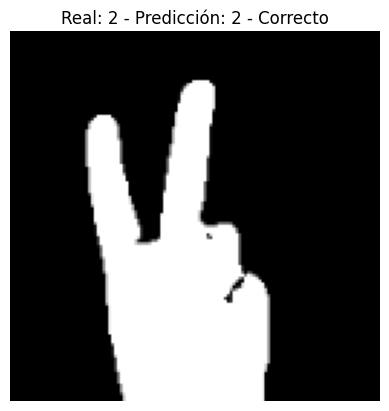

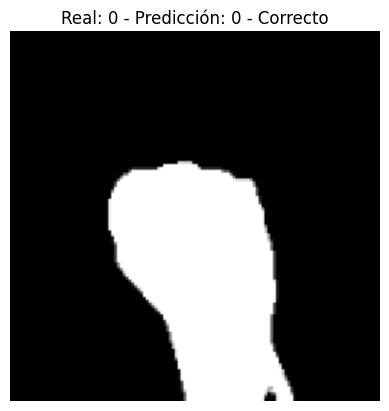

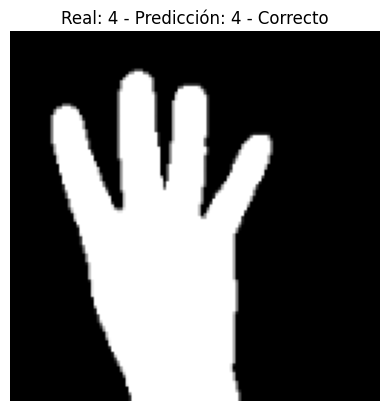

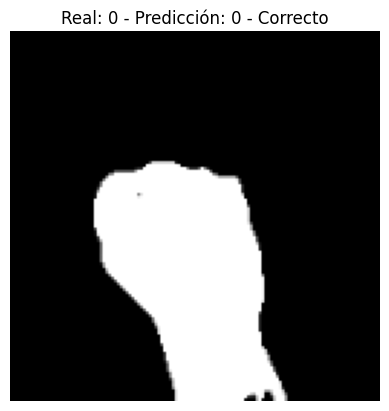

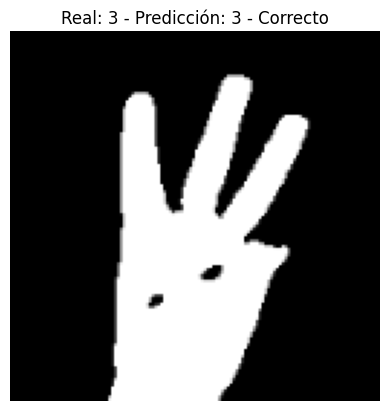

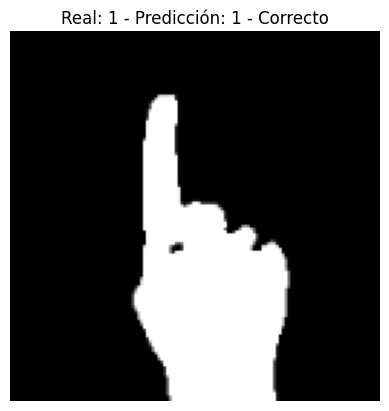

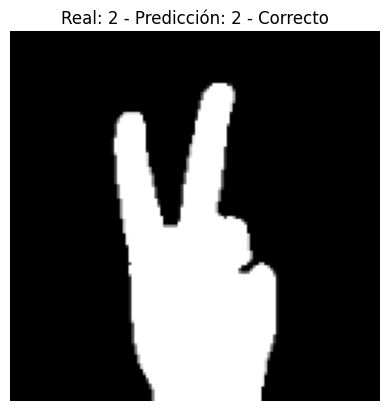

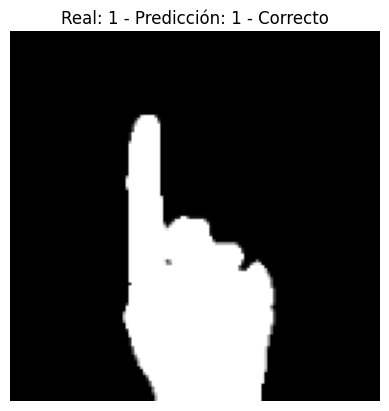

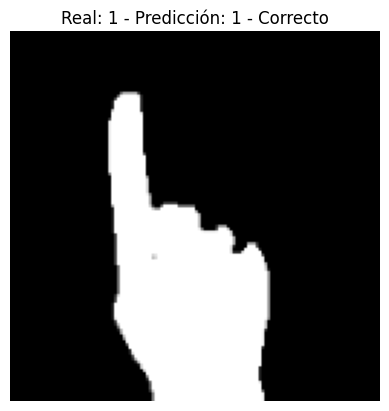

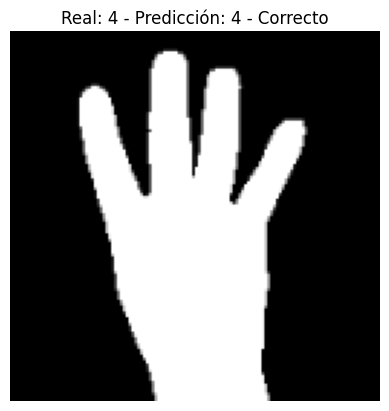

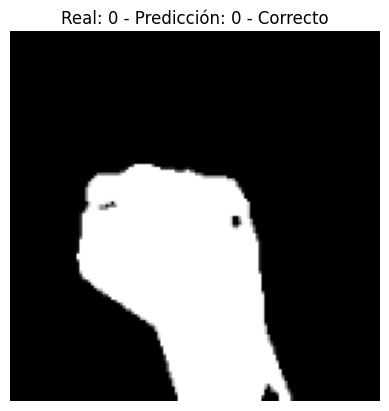

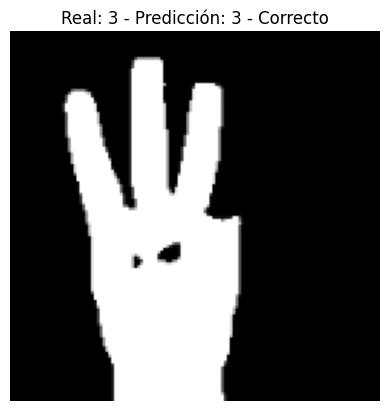

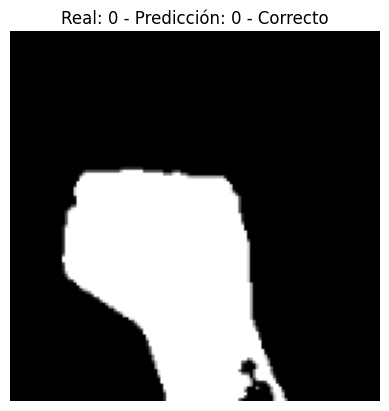

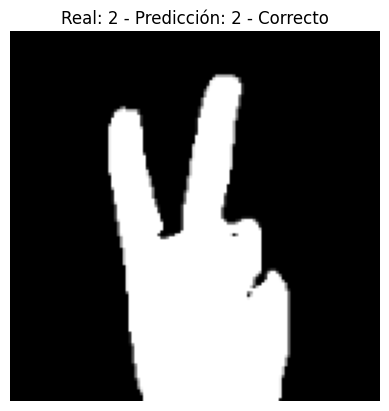

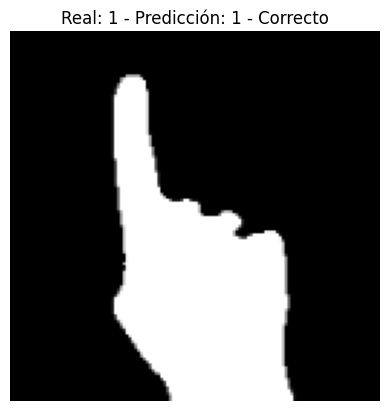

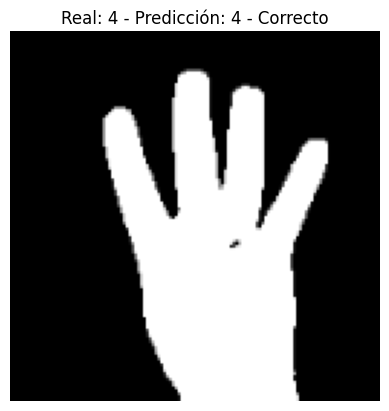

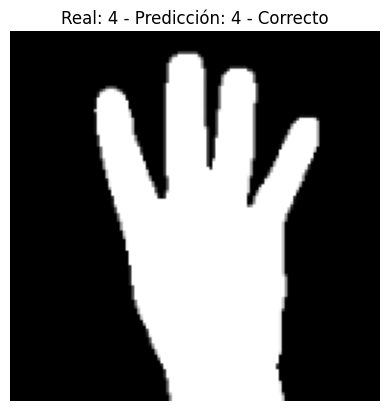

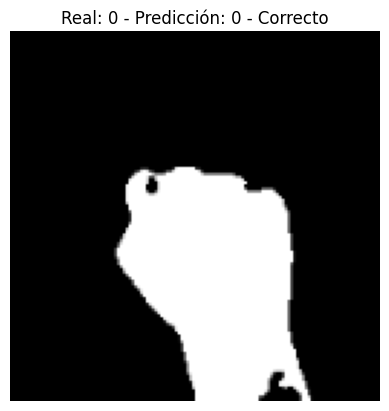

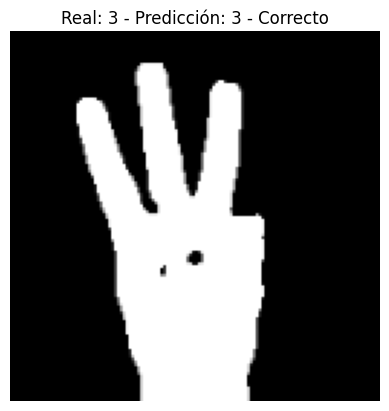

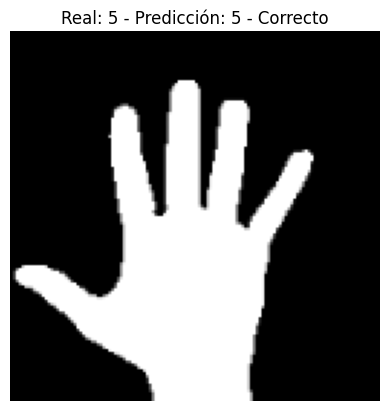

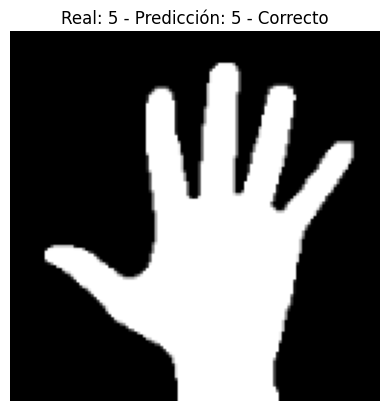

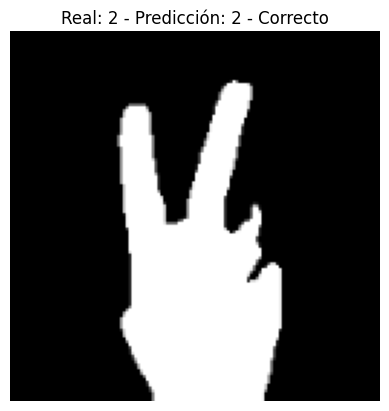

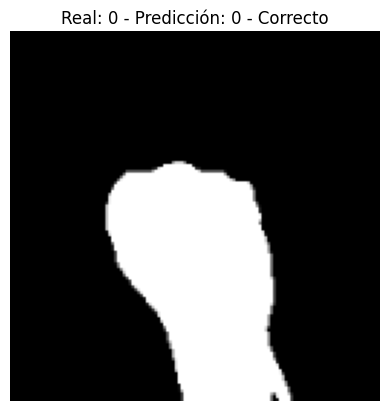

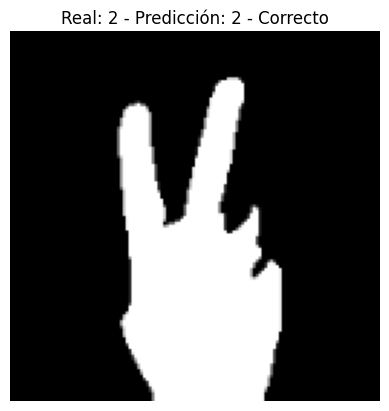

1/1 [==============================] - 0s 24ms/step


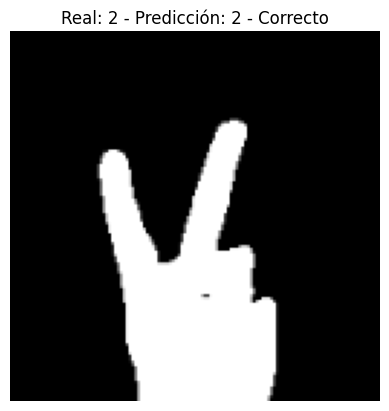

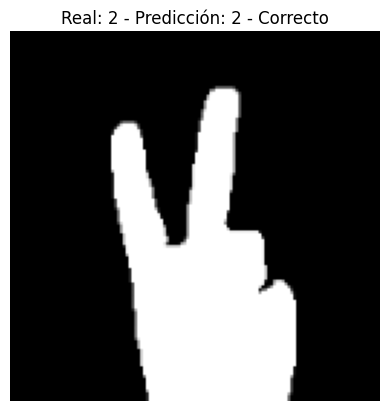

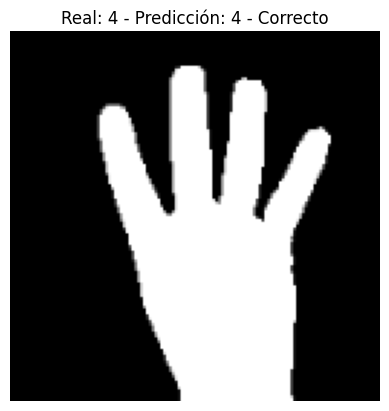

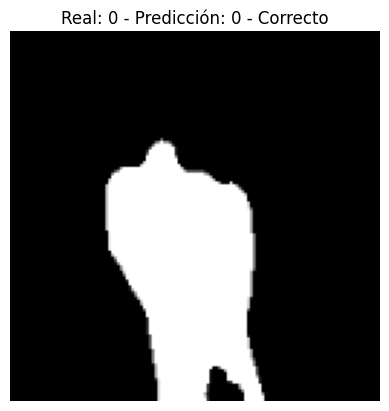

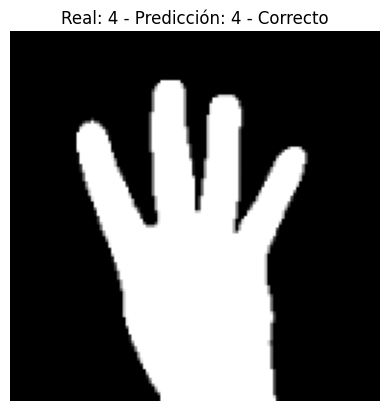

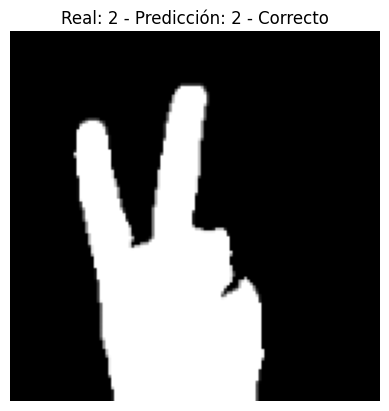

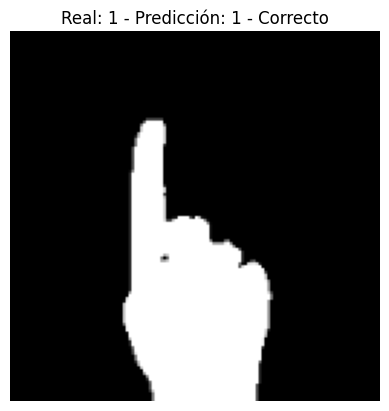

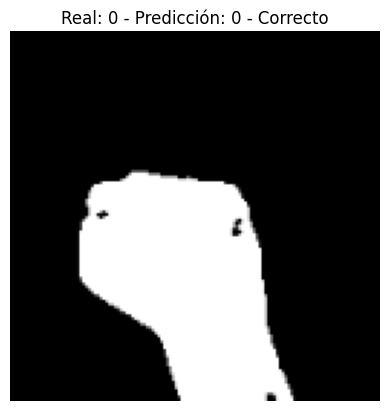

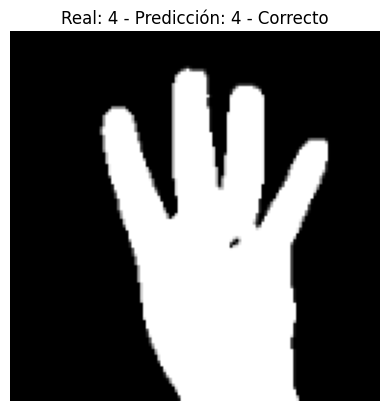

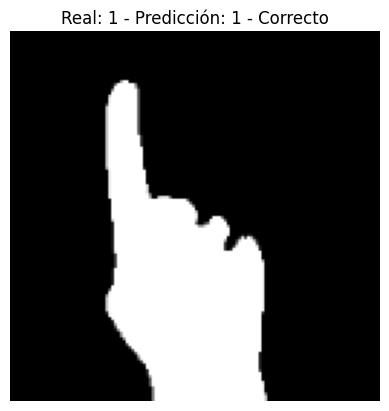

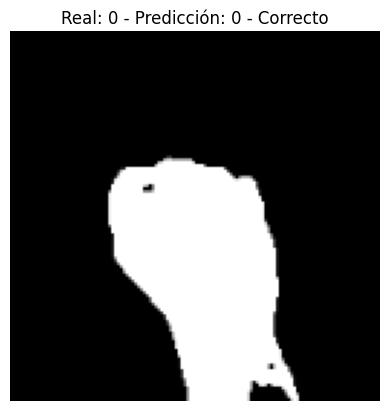

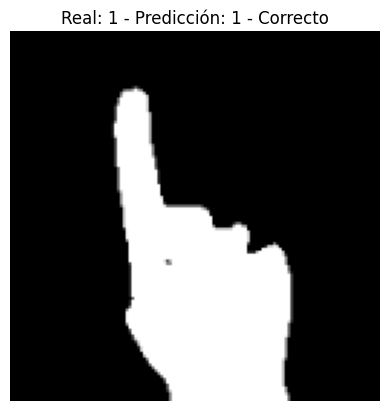

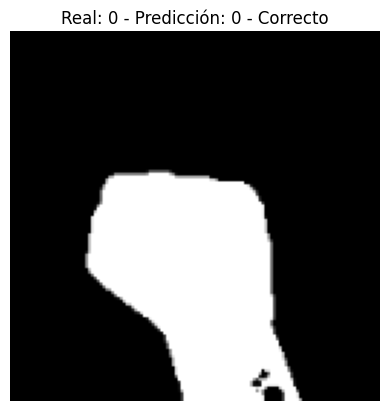

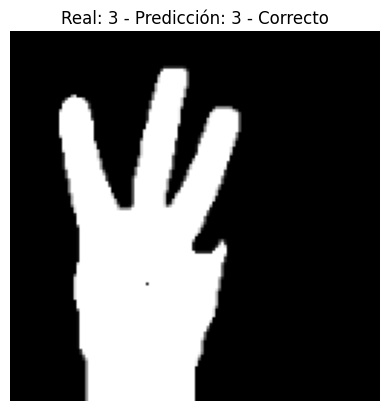

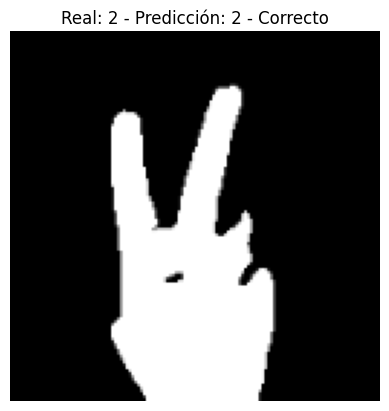

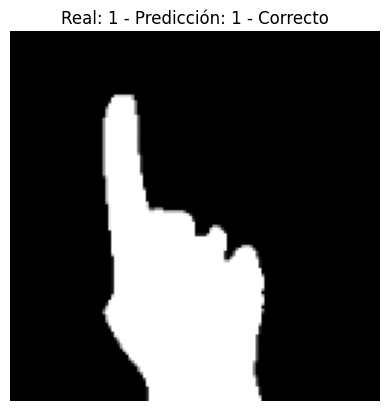

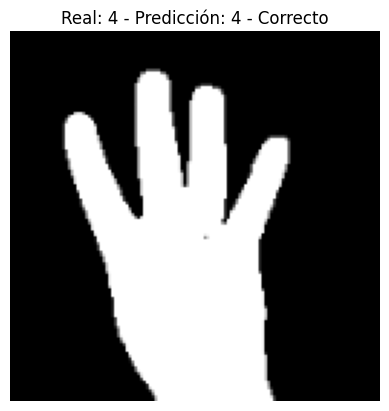

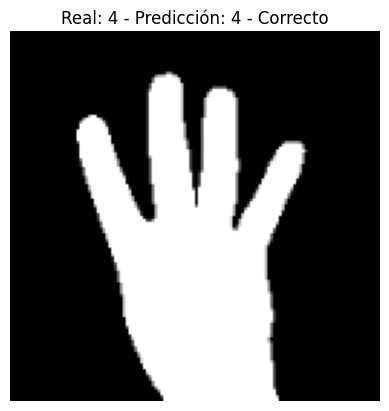

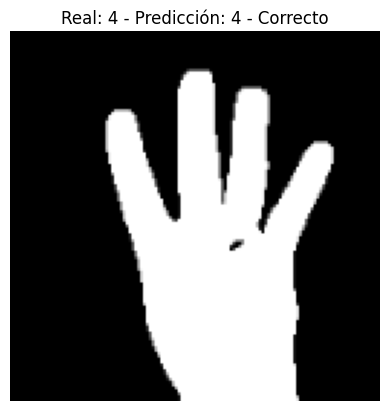

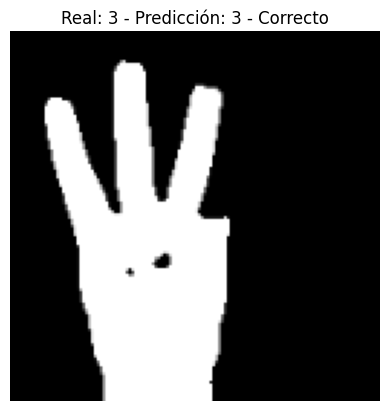

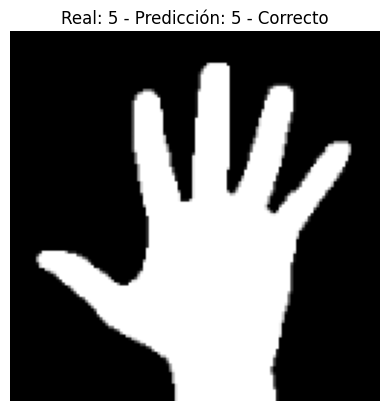

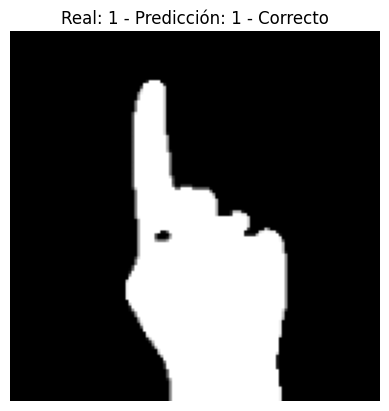

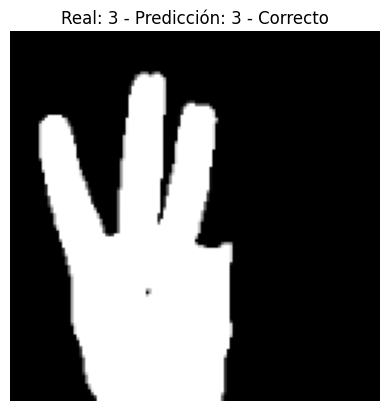

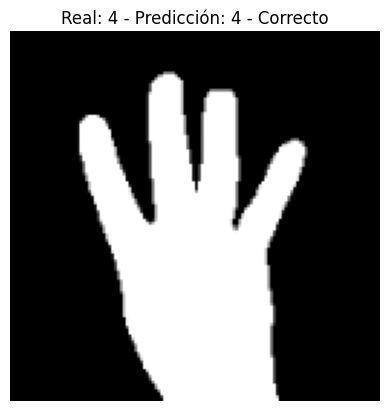

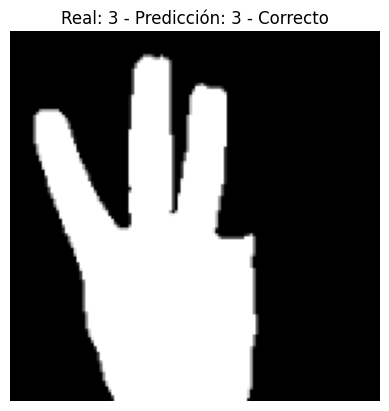

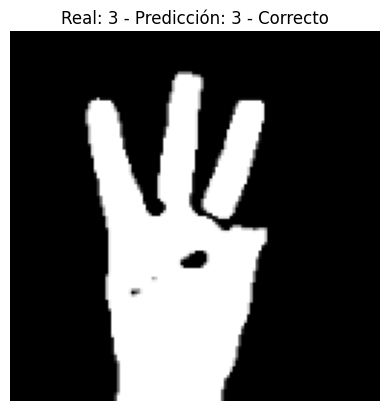

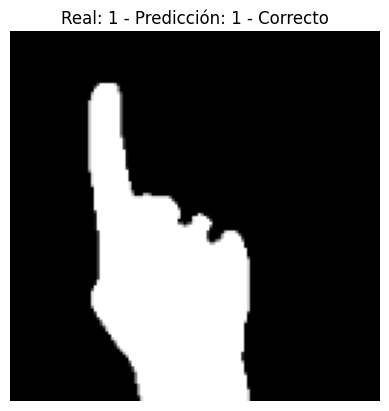

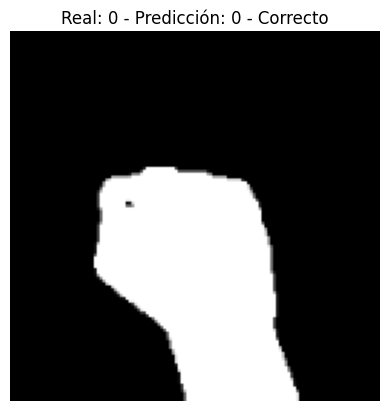

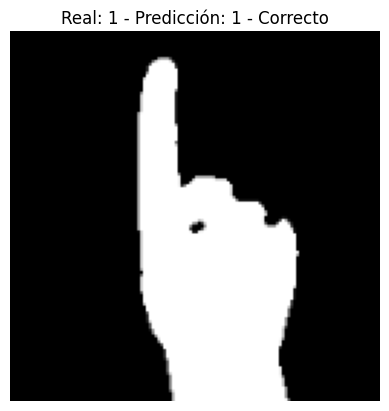

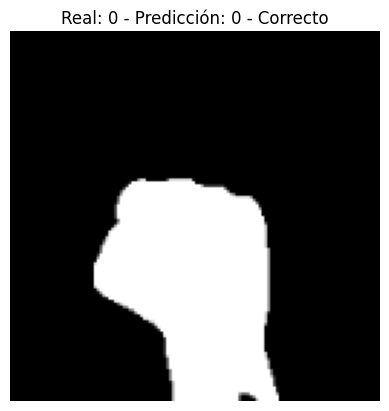

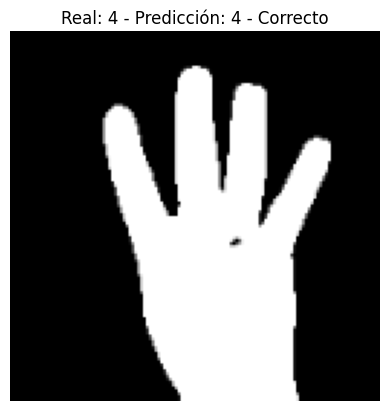

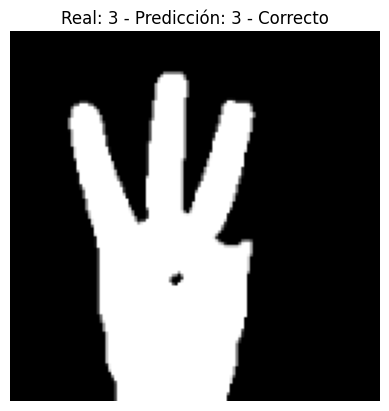

1/1 [==============================] - 0s 93ms/step


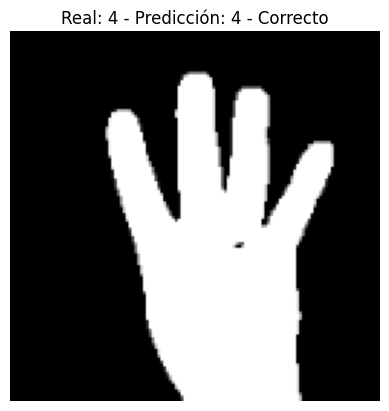

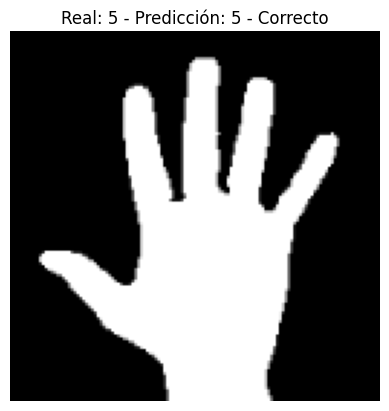

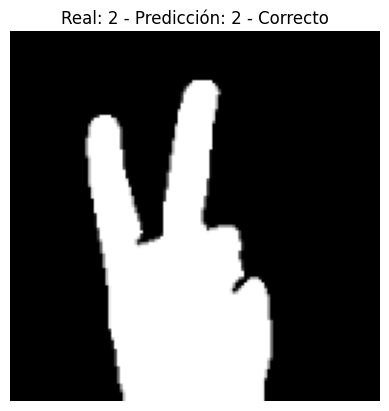

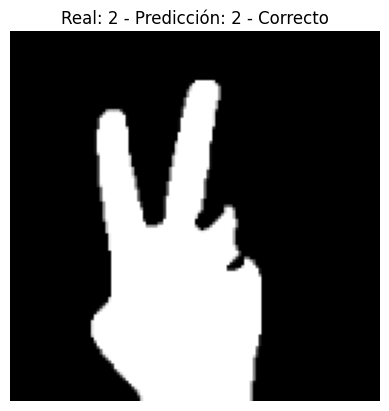

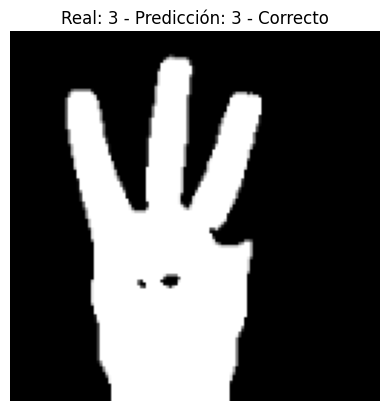

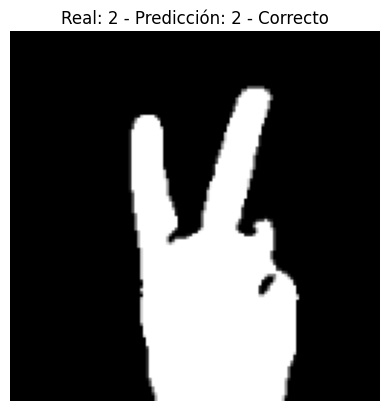

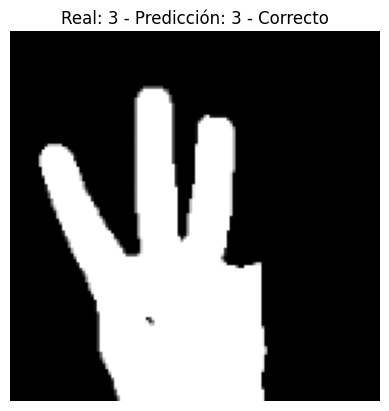

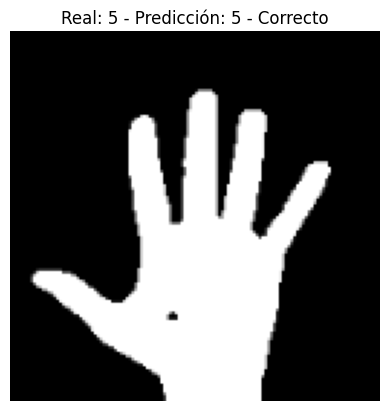

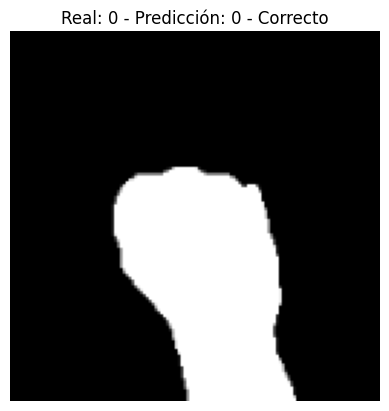

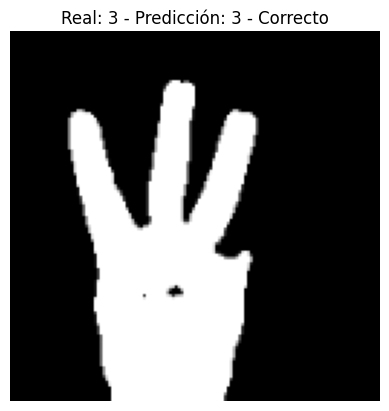

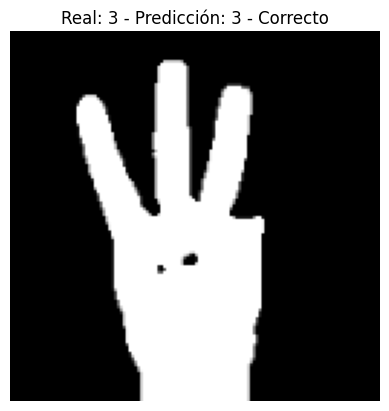

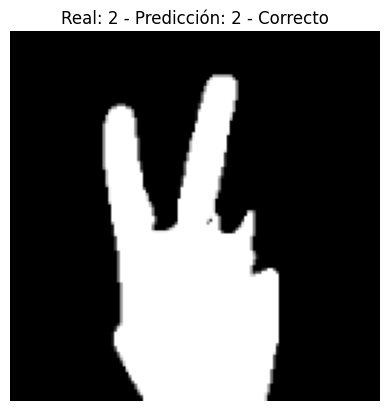

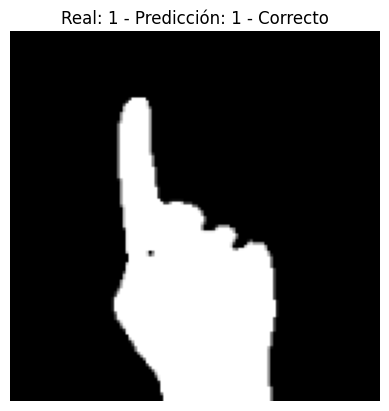

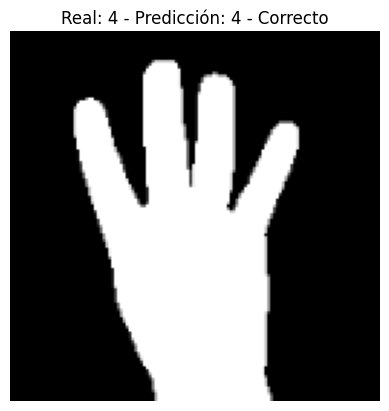

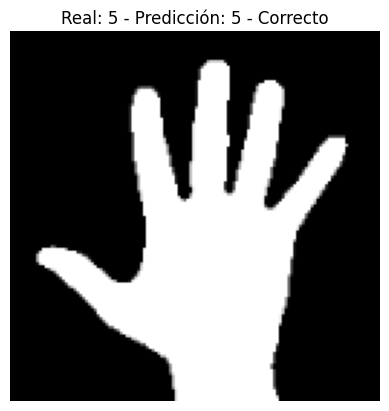

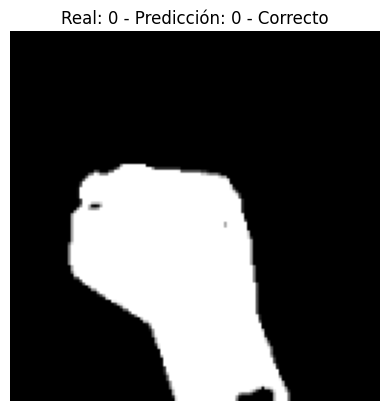

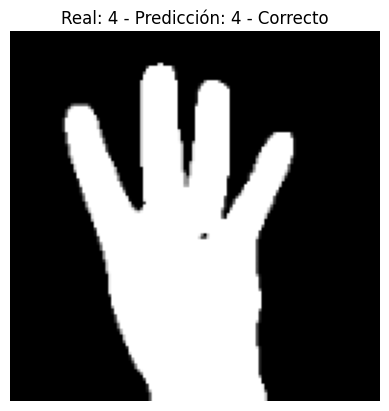

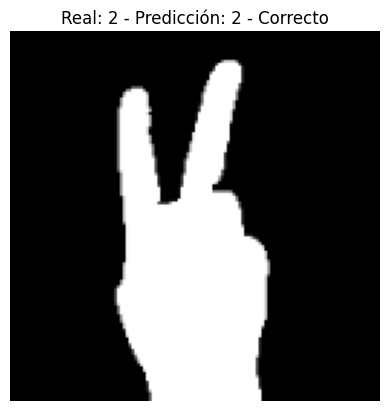

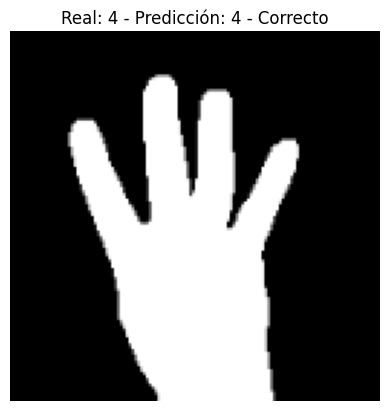

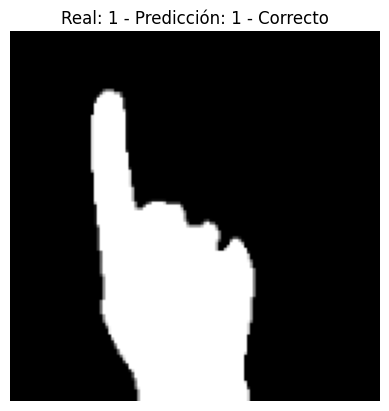

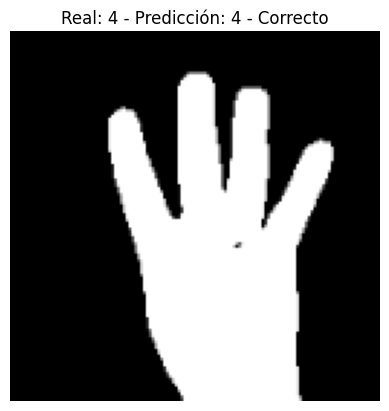

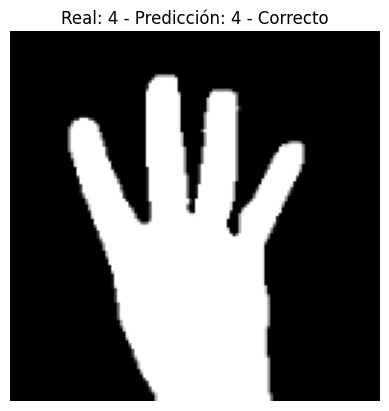

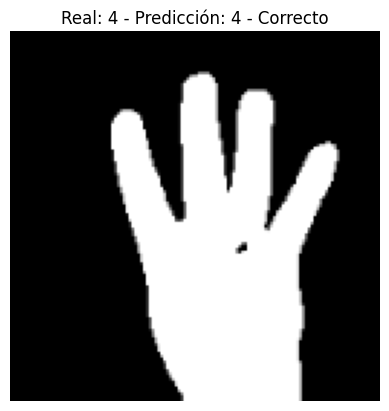

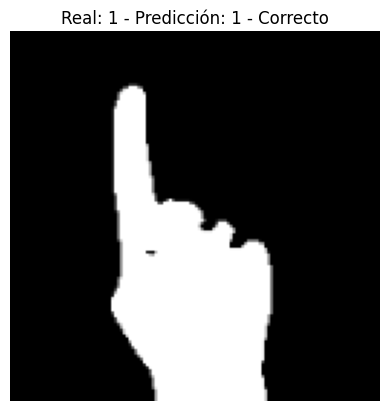

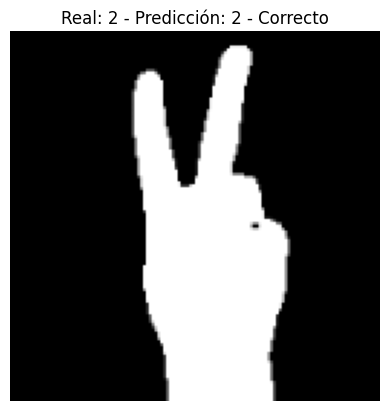

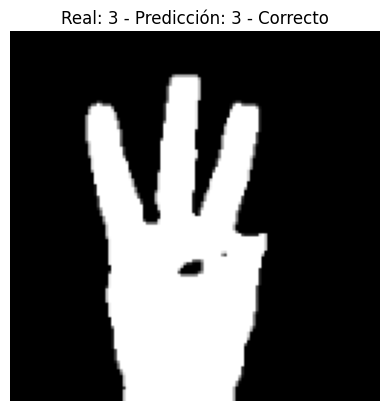

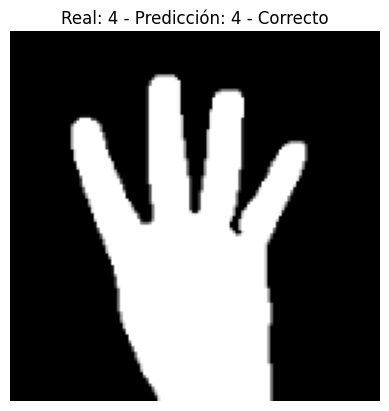

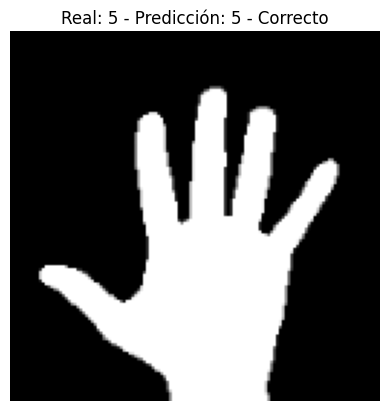

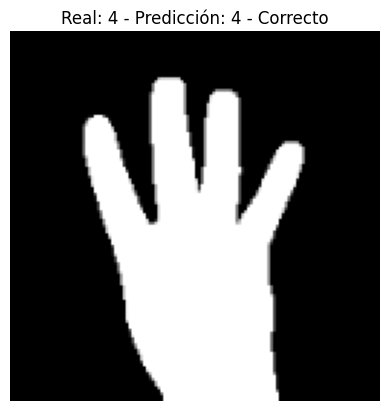

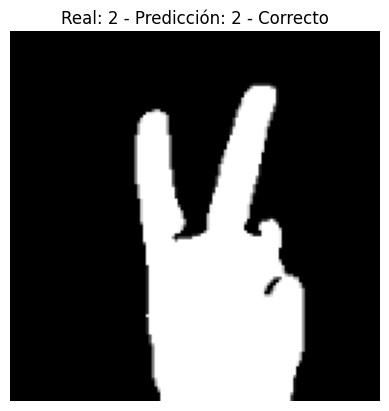

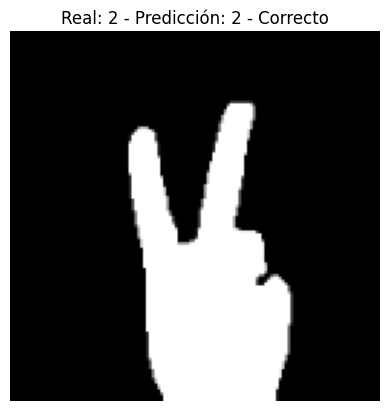

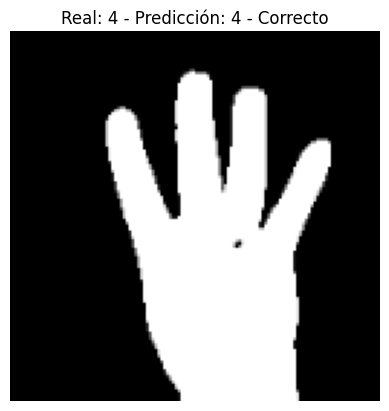

1/1 [==============================] - 0s 33ms/step


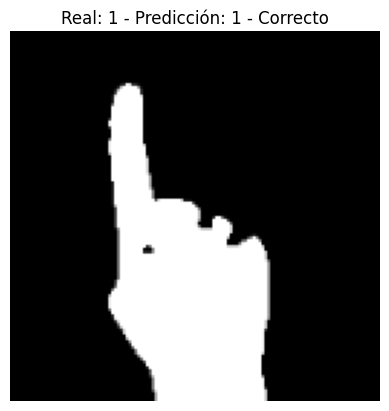

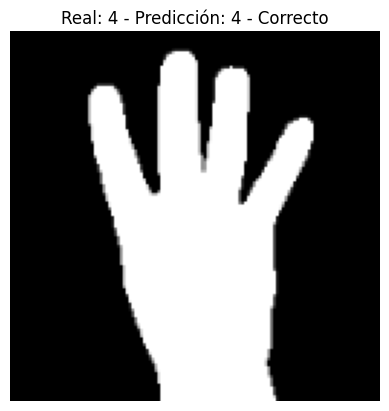

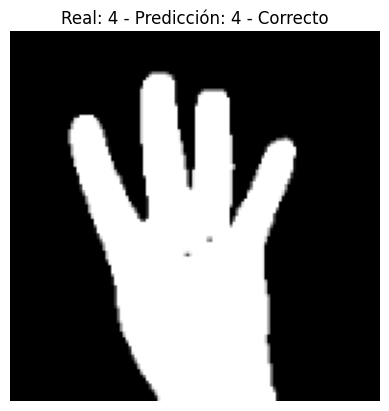

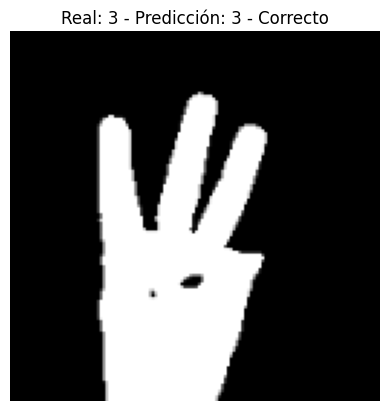

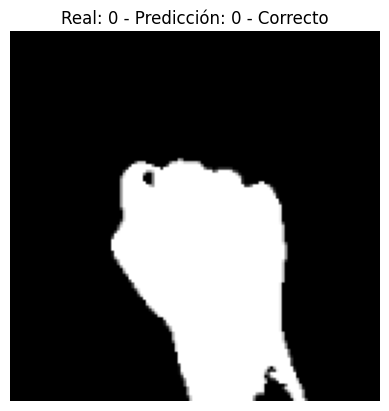

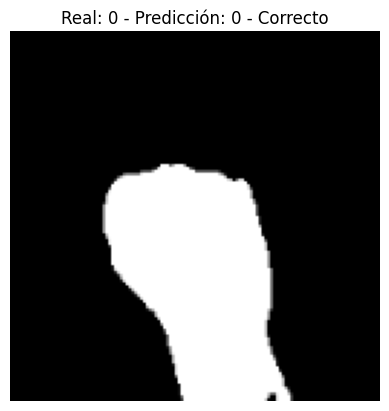

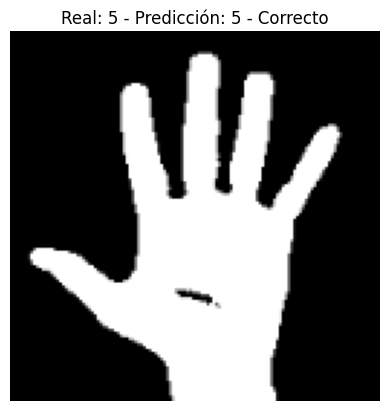

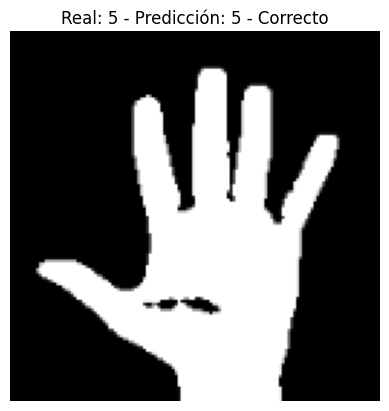

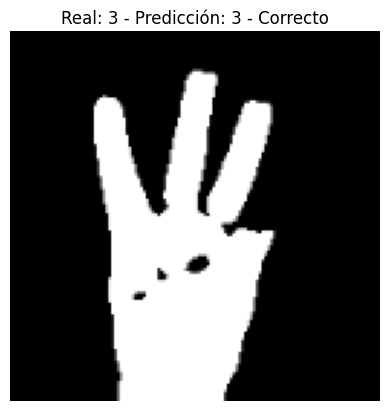

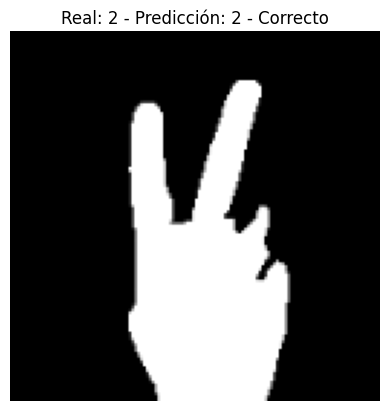

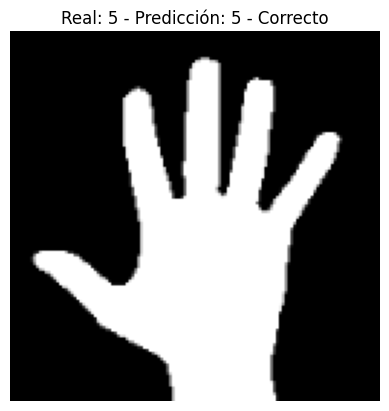

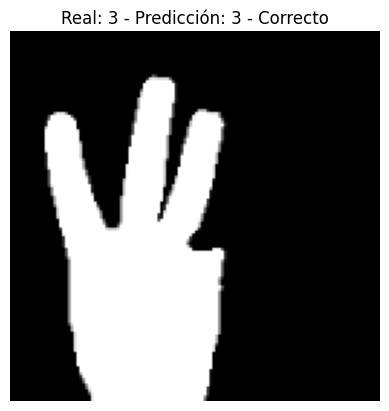

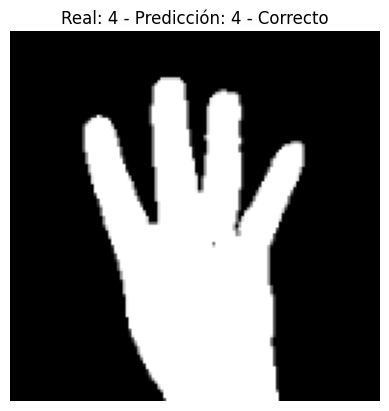

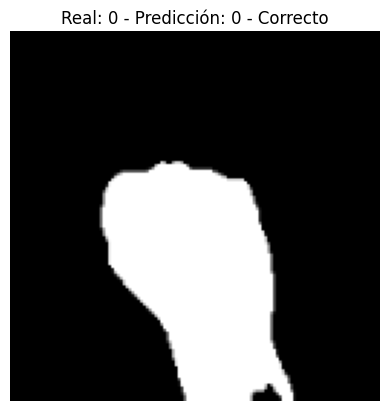

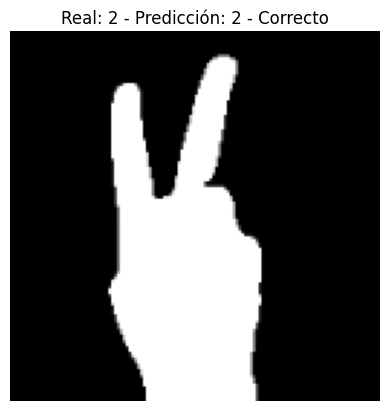

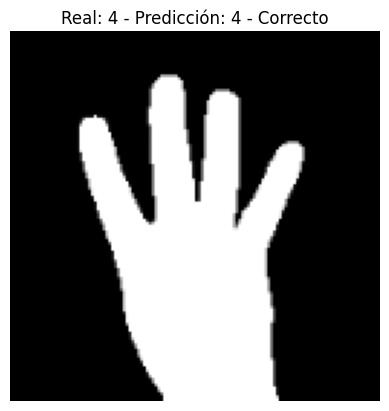

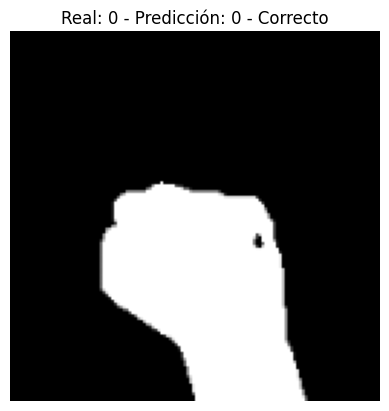

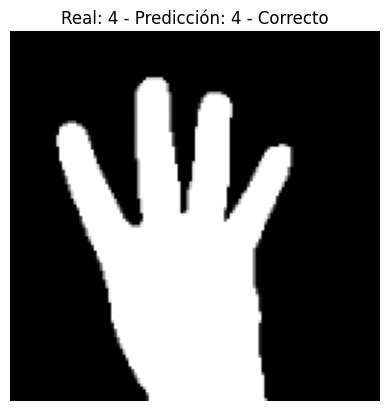

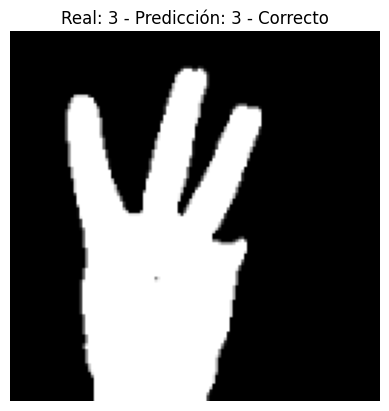

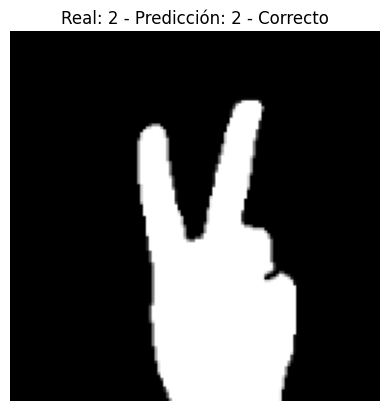

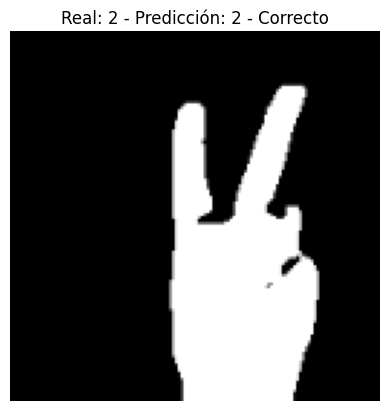

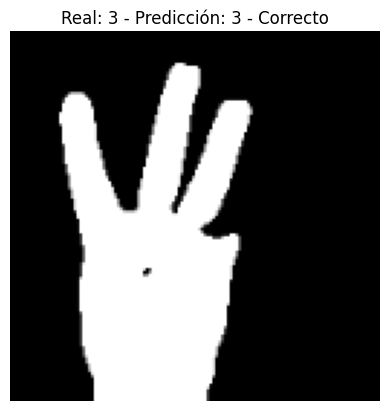

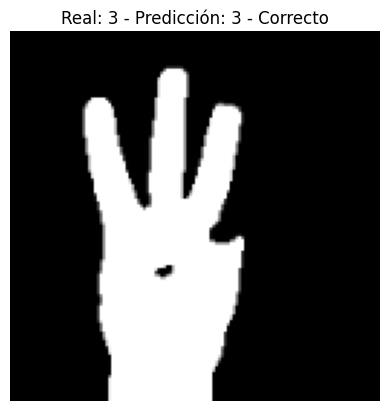

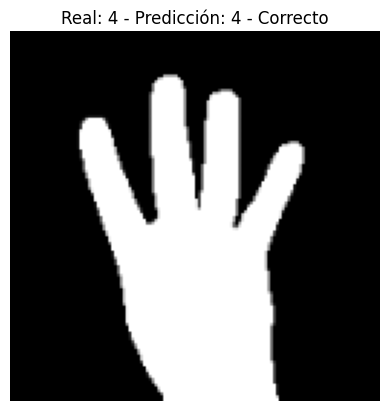

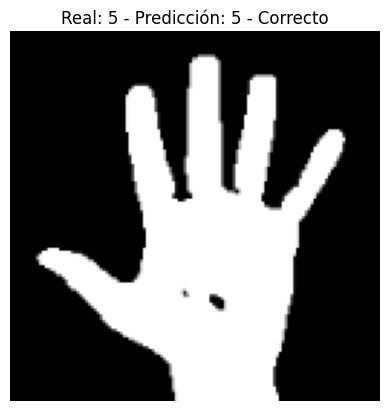

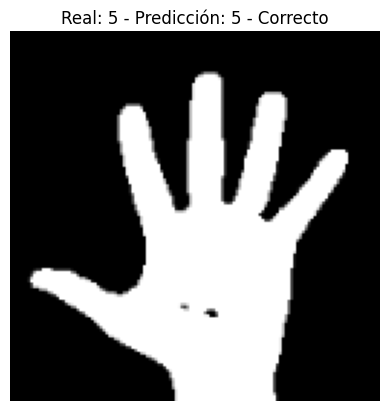

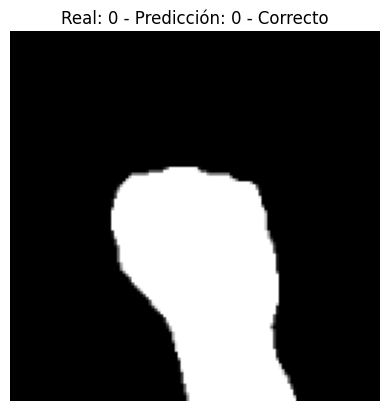

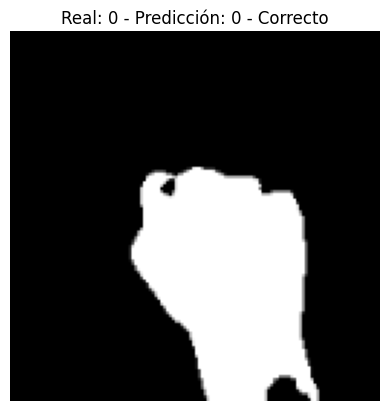

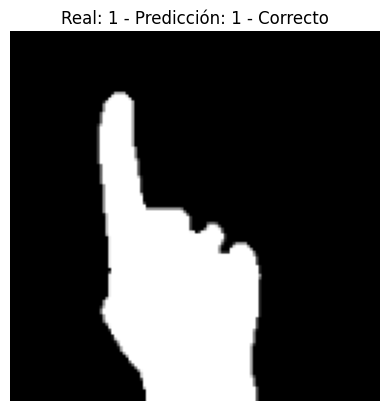

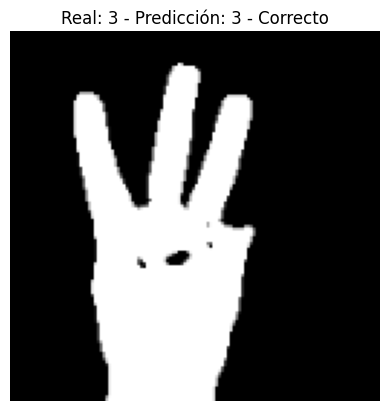

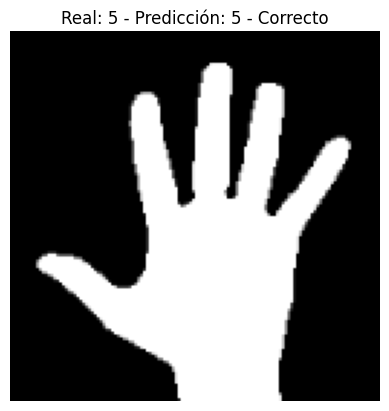

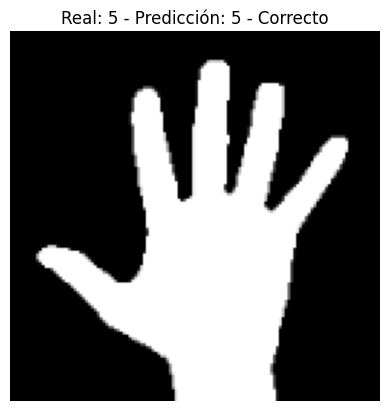

1/1 [==============================] - 0s 42ms/step


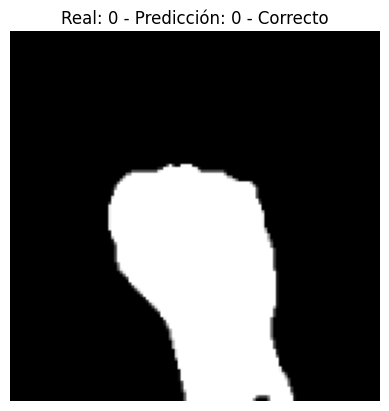

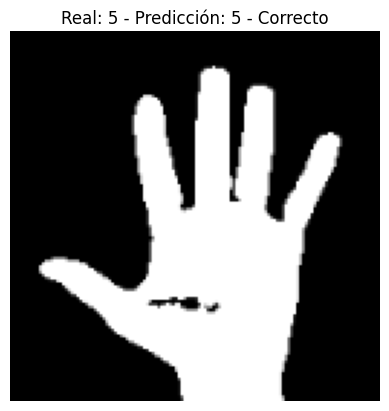

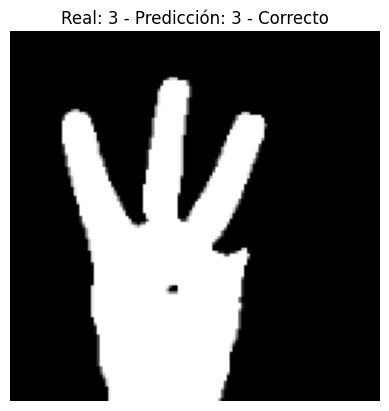

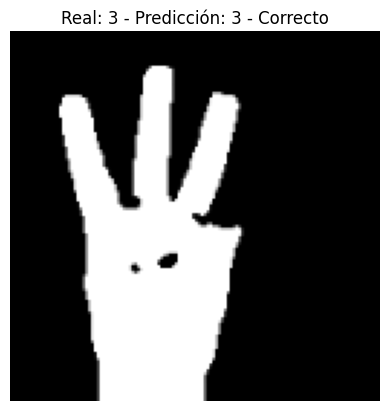

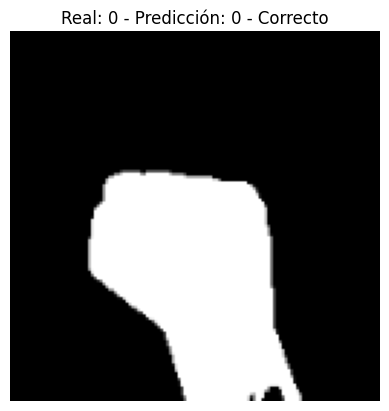

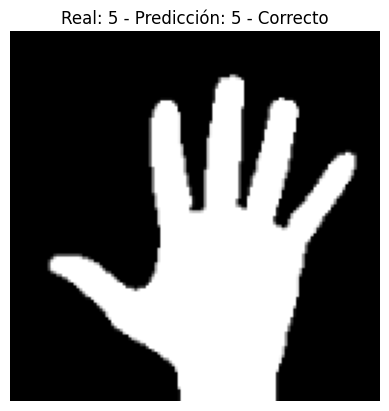

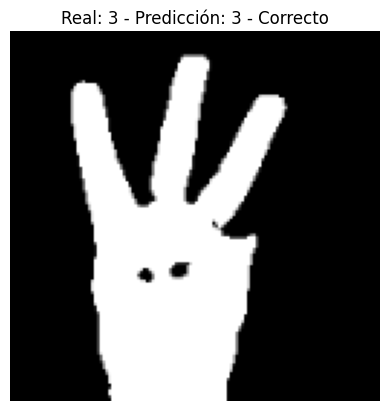

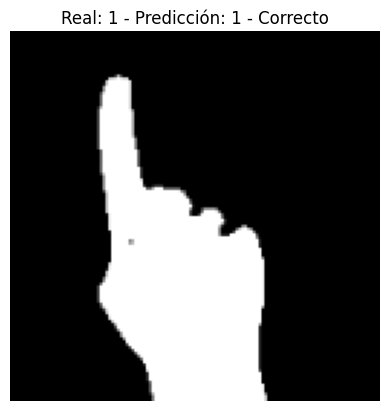

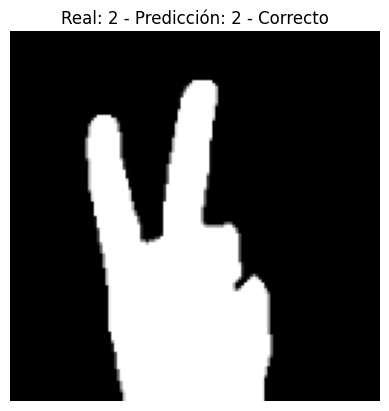

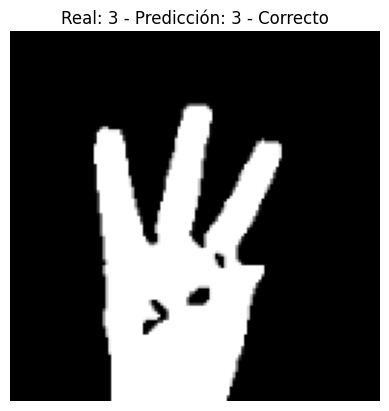

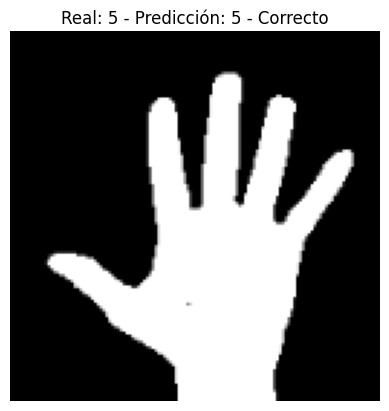

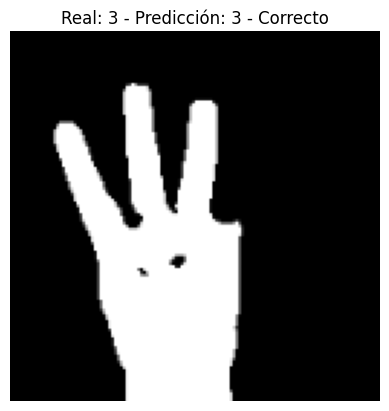

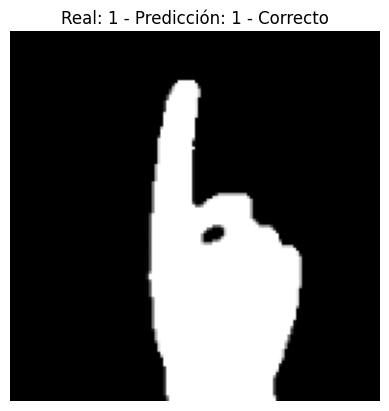

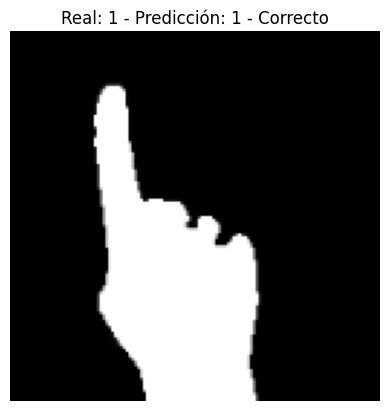

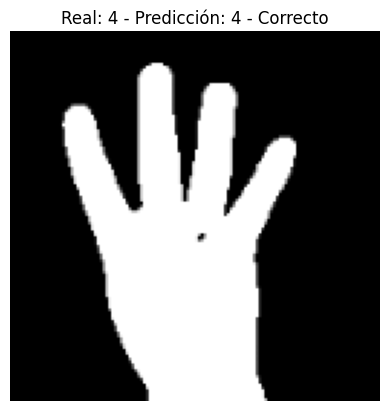

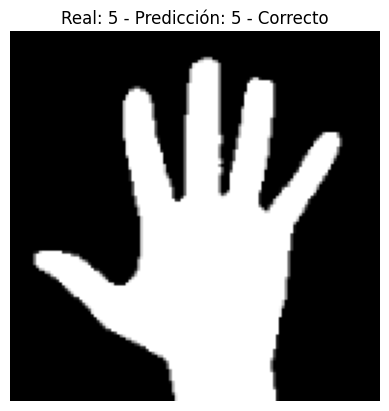

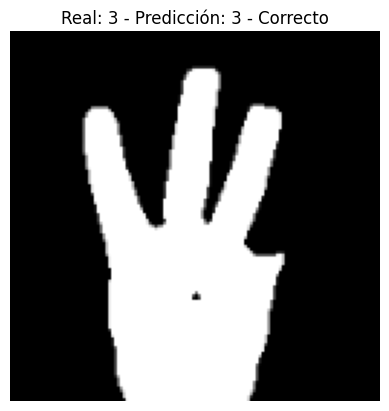

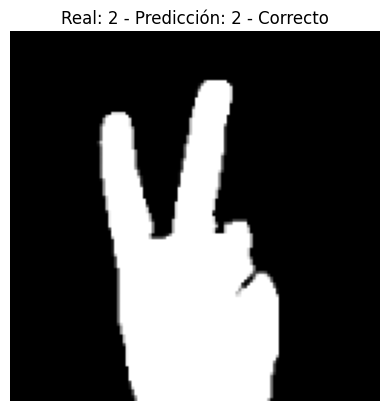

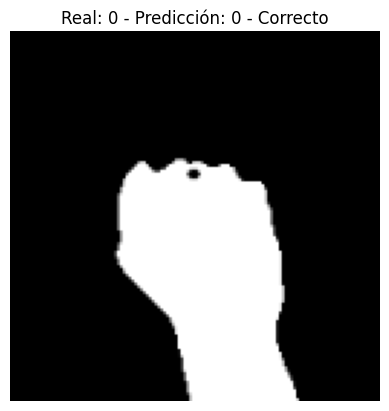

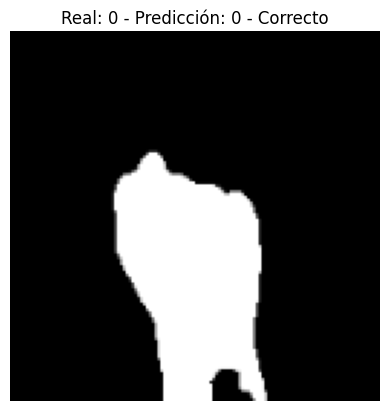

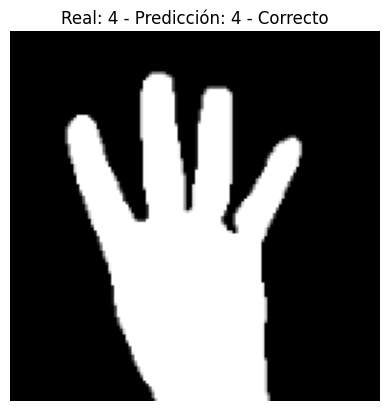

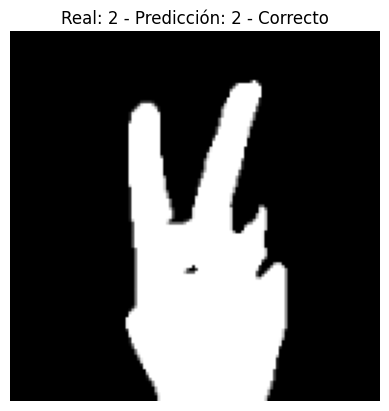

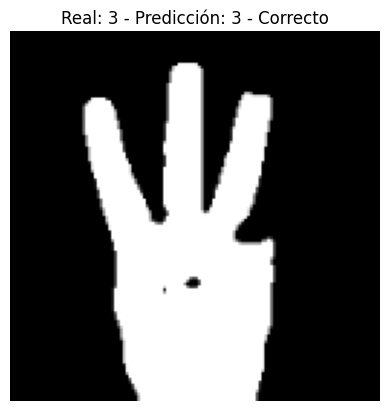

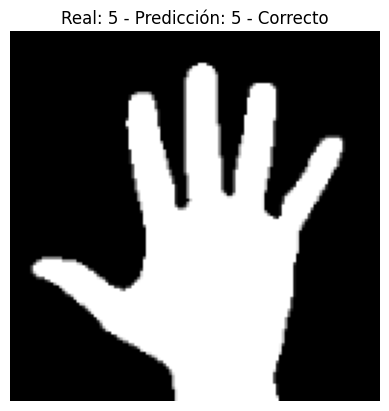

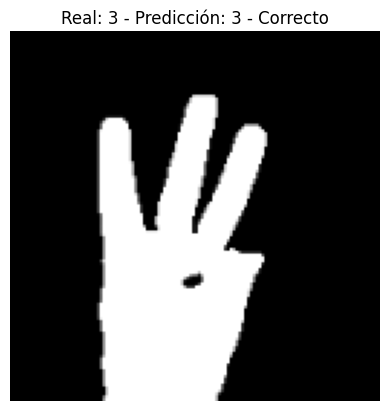

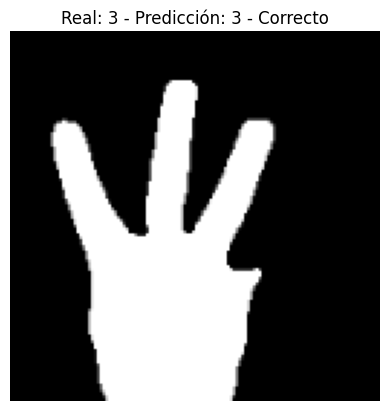

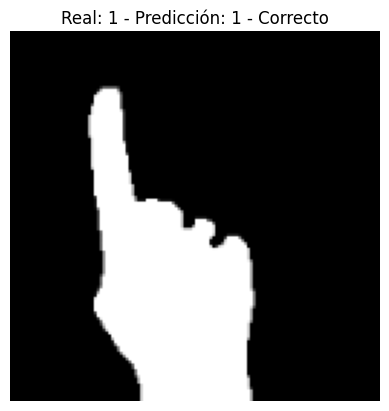

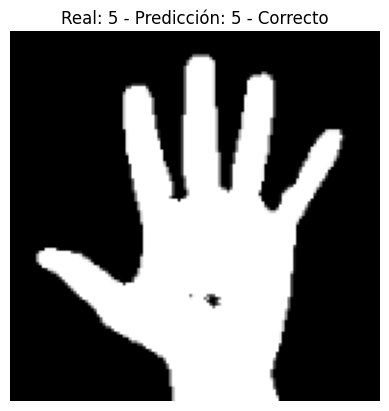

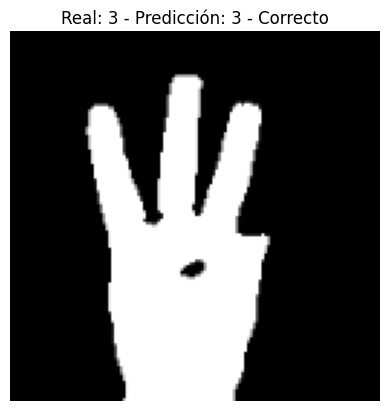

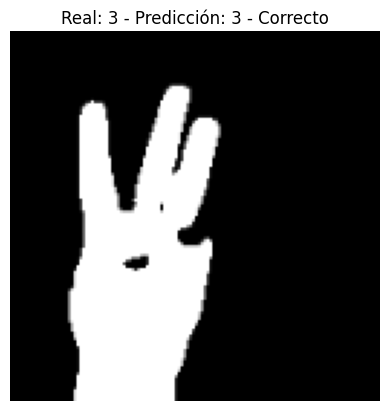

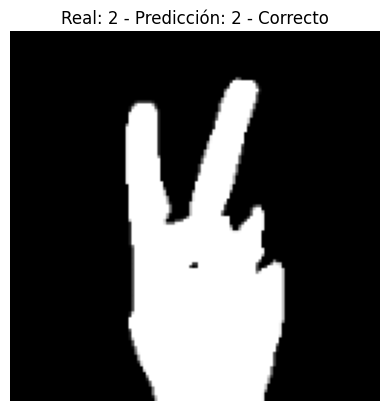

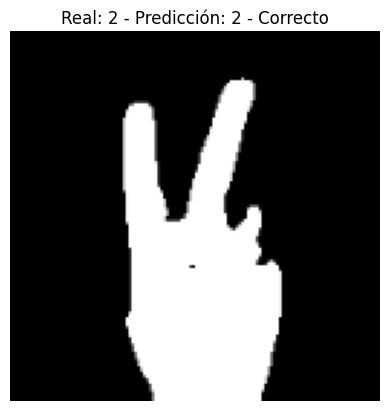

1/1 [==============================] - 0s 39ms/step


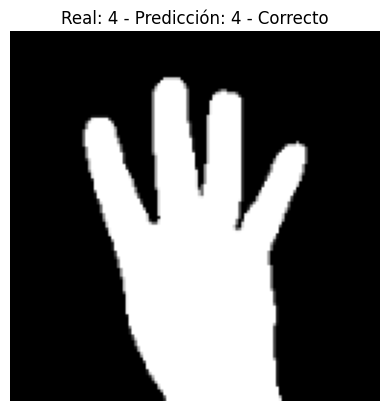

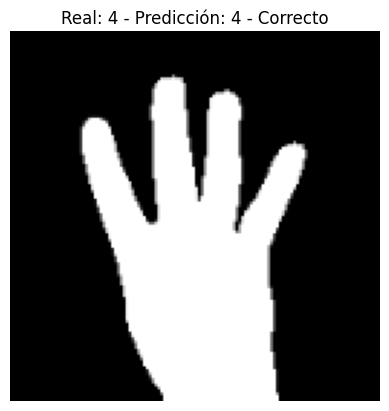

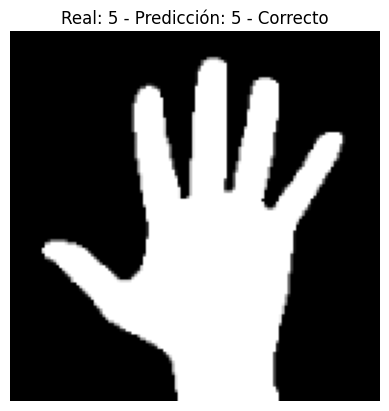

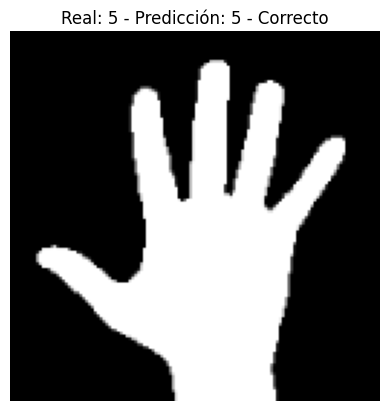

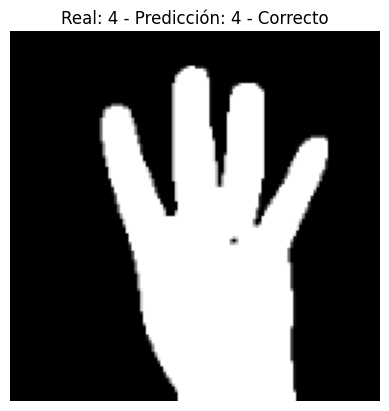

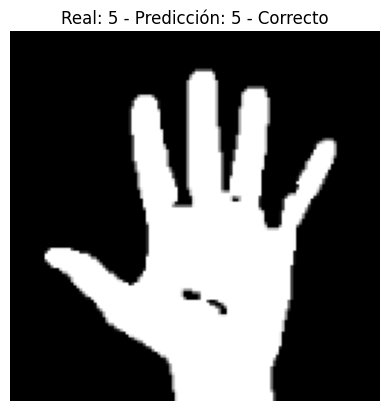

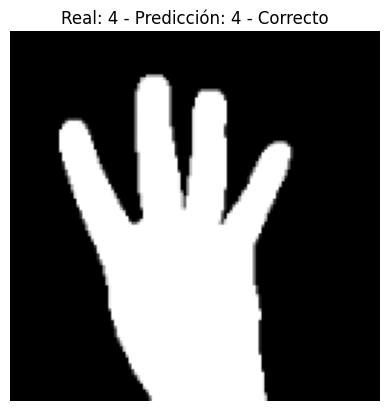

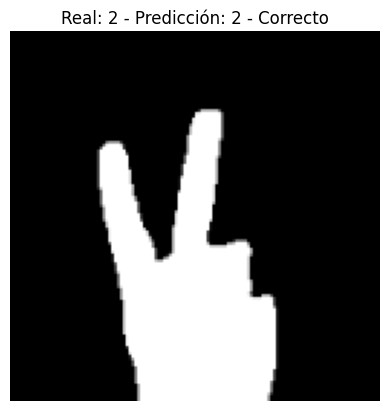

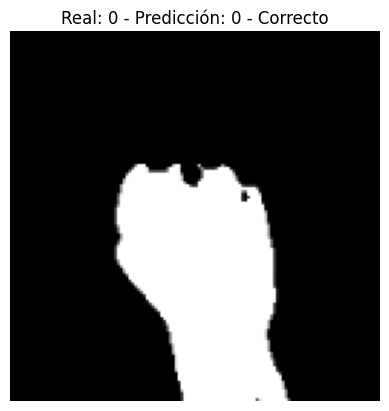

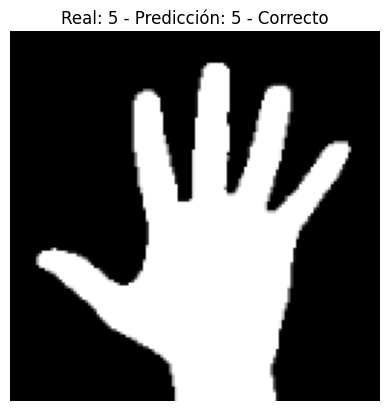

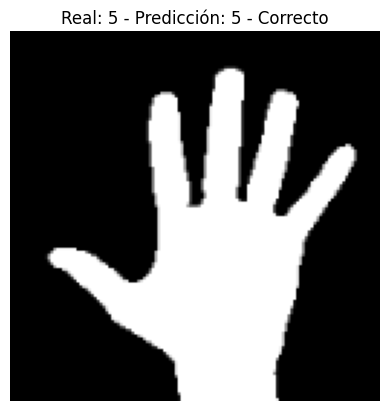

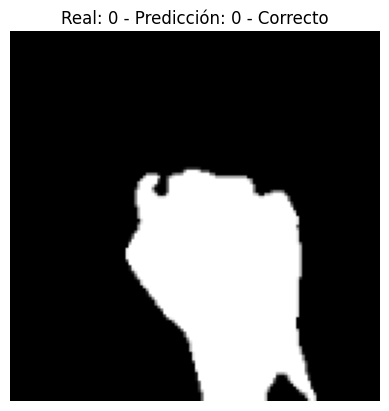

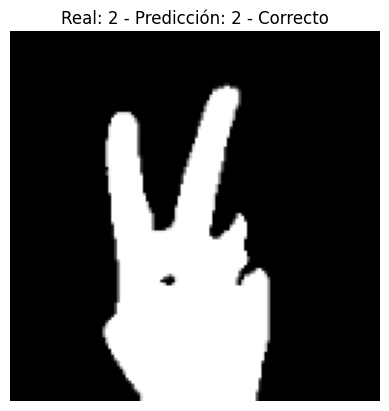

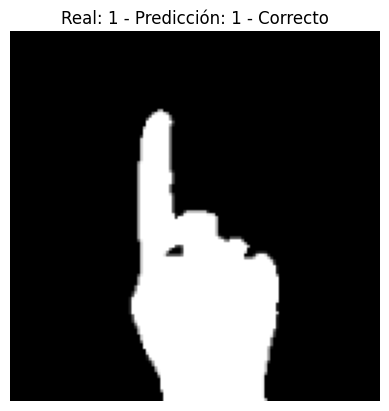

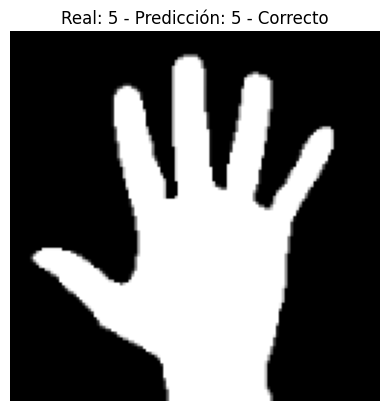

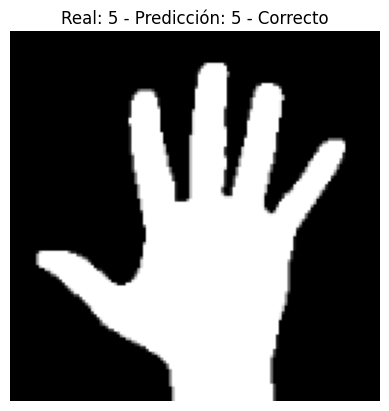

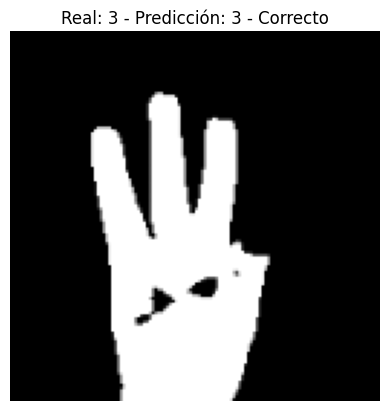

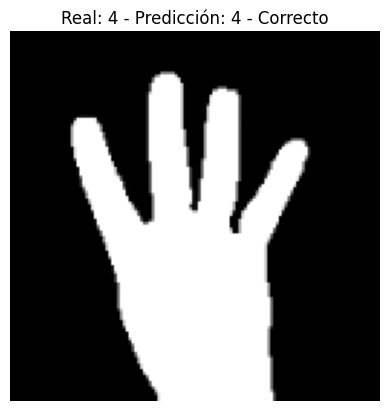

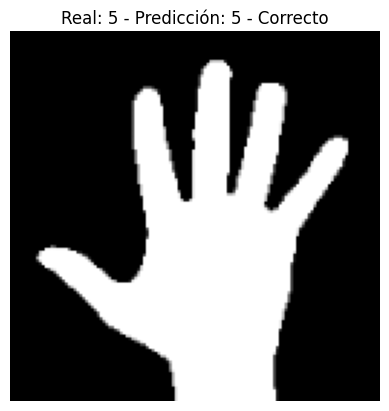

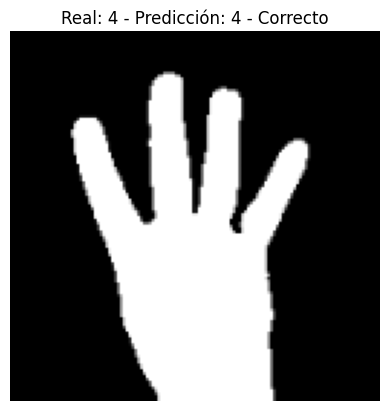

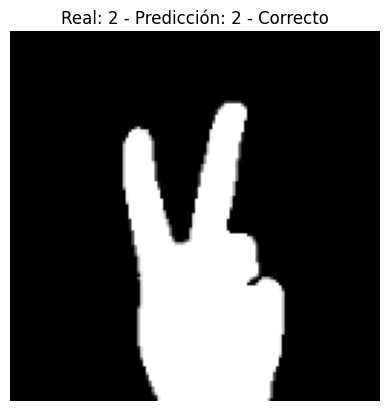

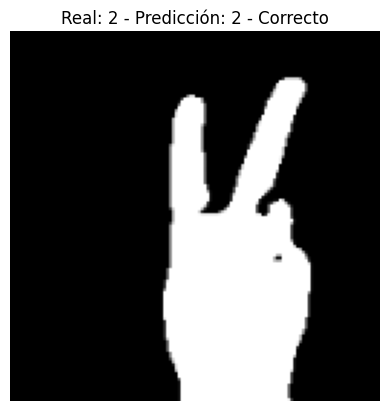

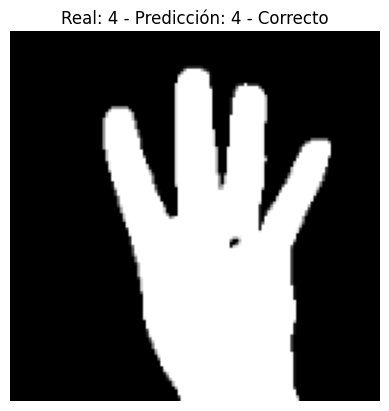

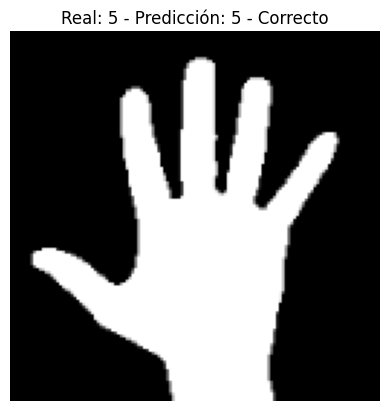

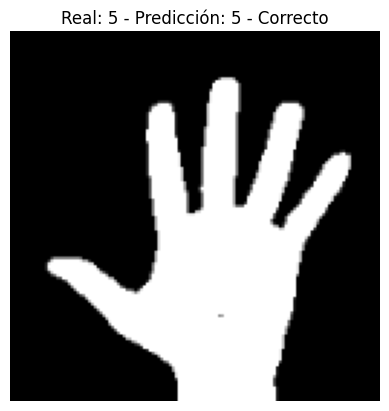

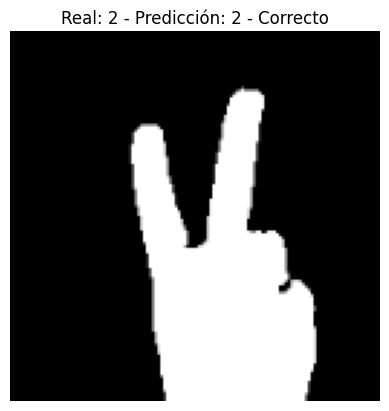

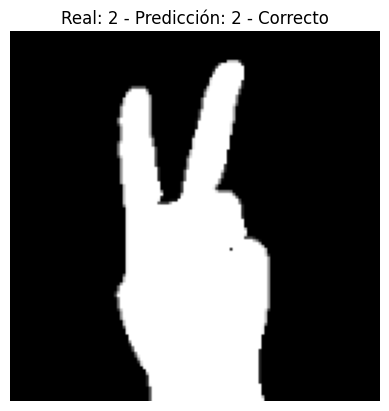

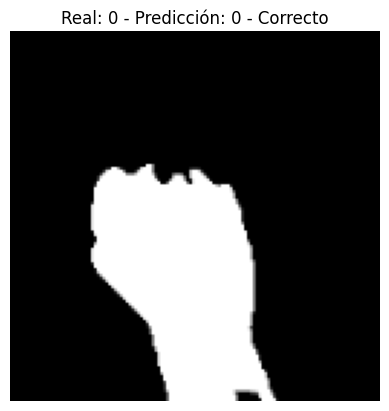

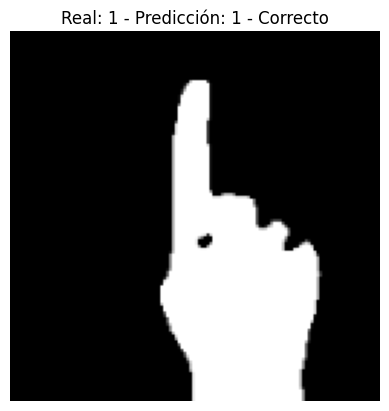

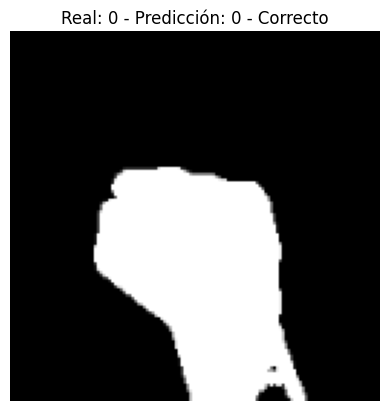

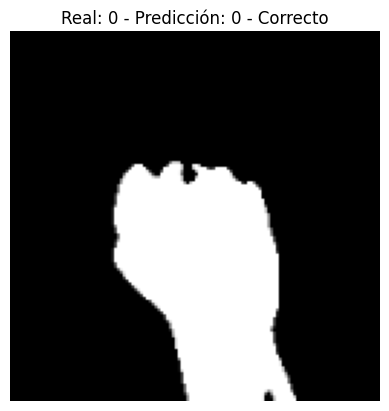

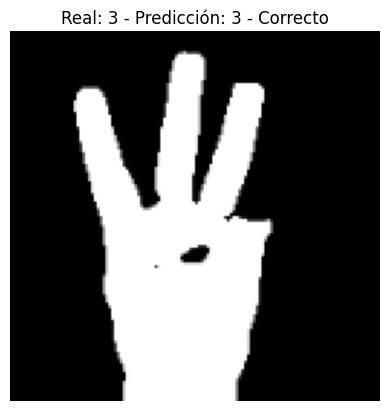

1/1 [==============================] - 0s 42ms/step


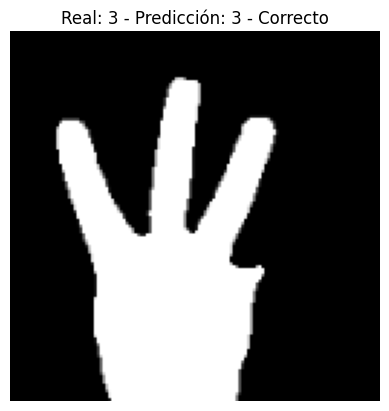

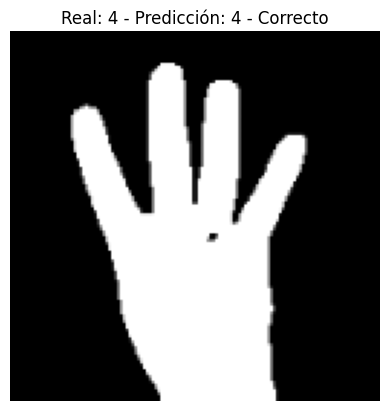

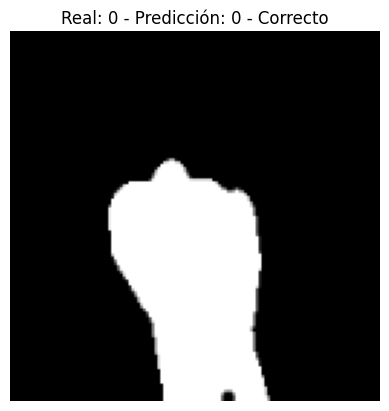

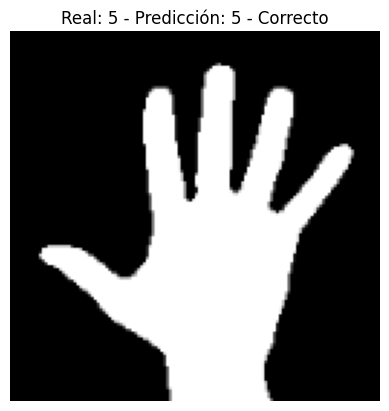

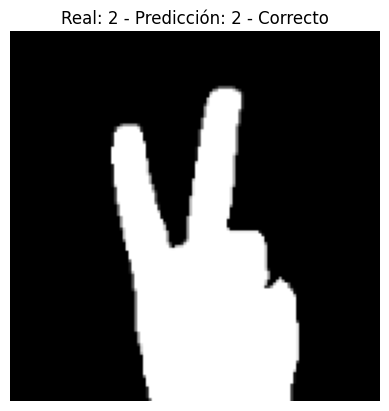

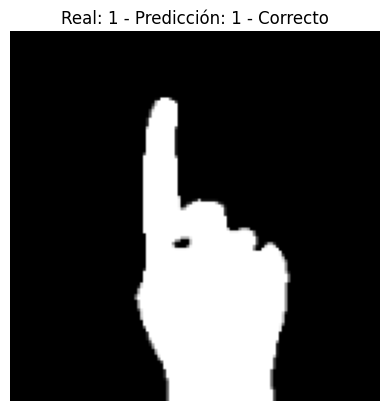

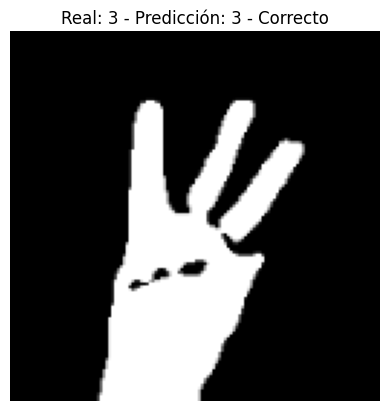

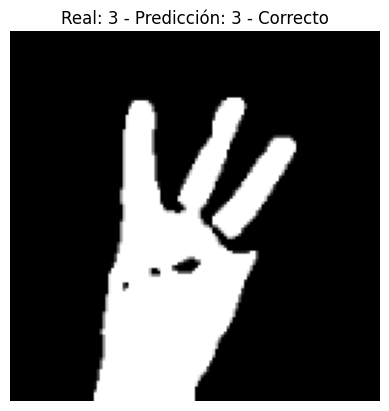

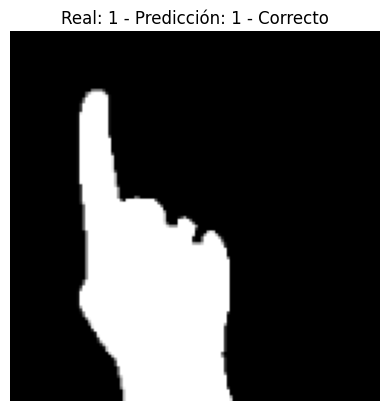

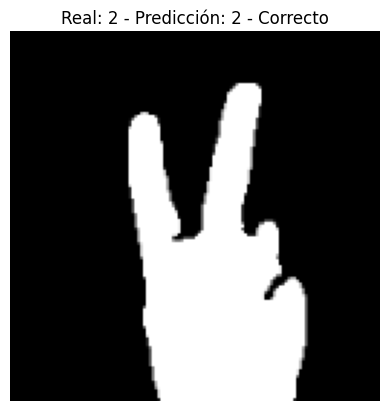

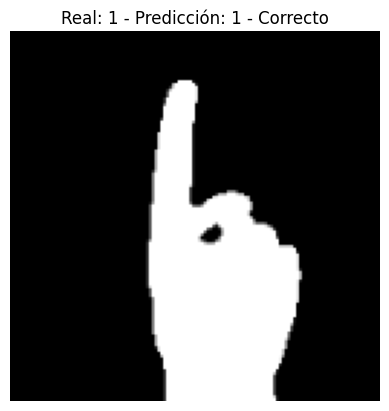

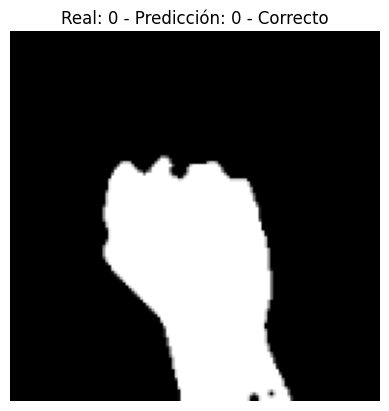

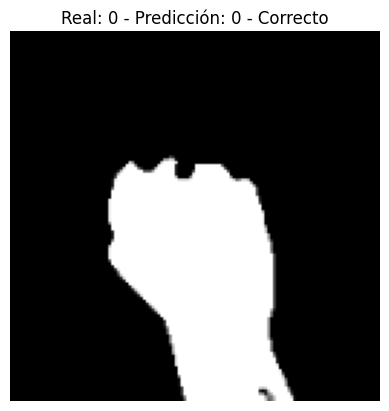

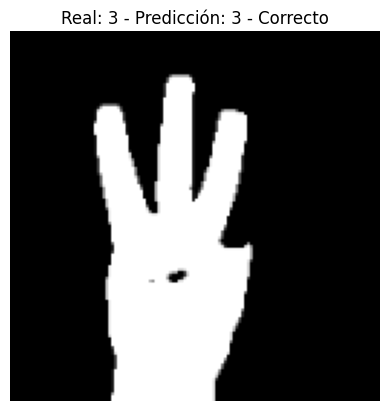

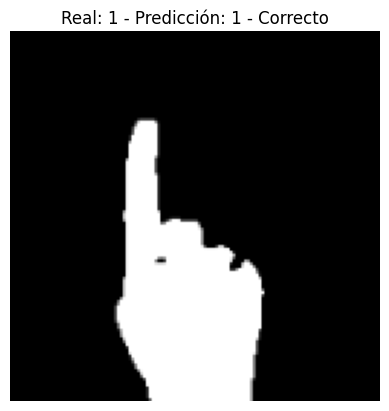

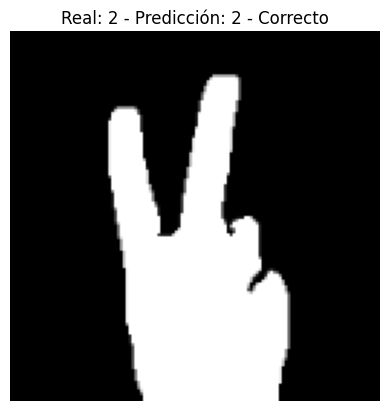

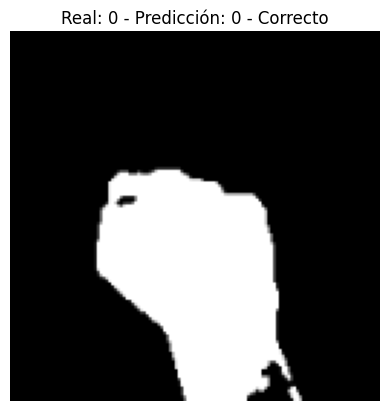

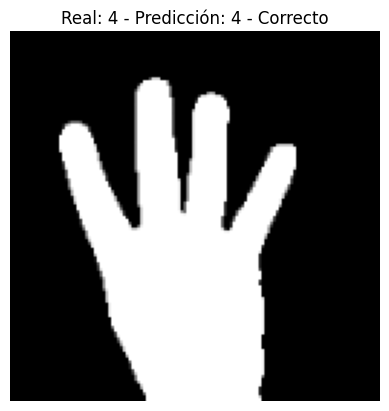

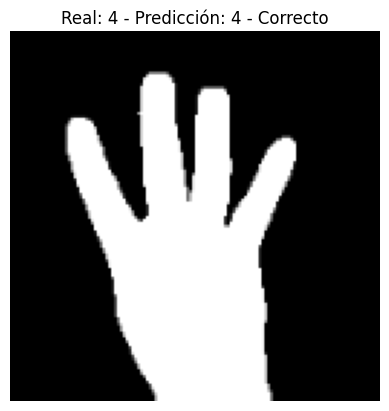

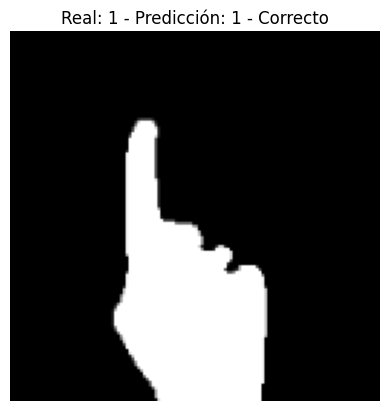

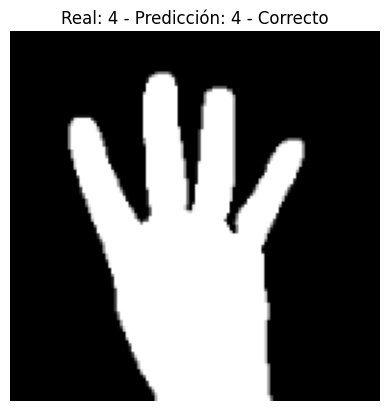

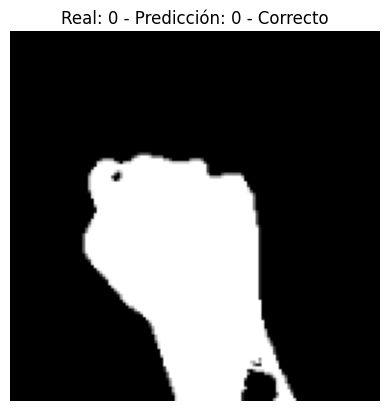

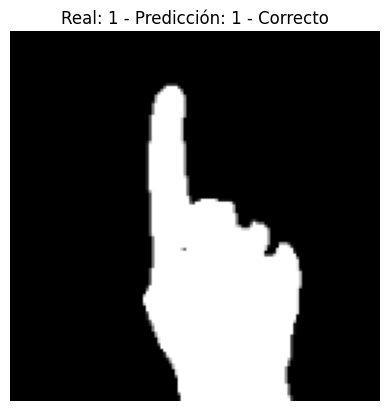

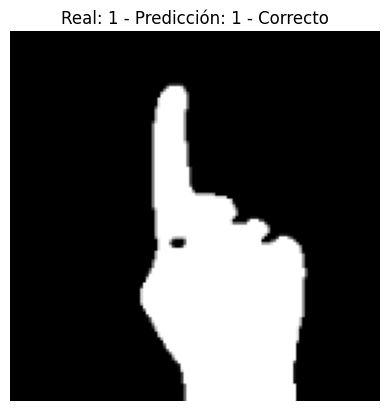

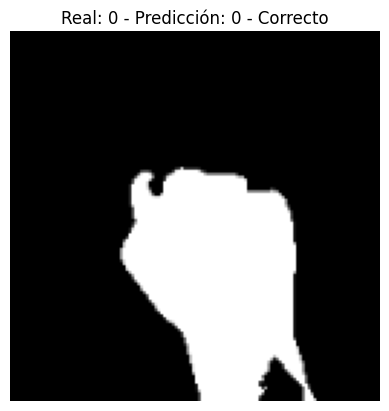

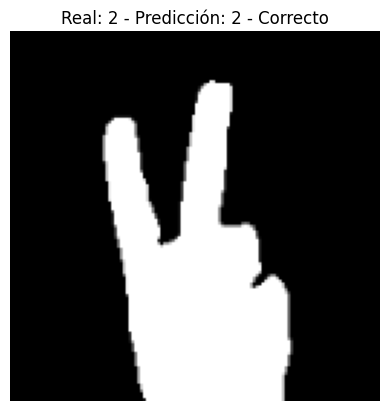

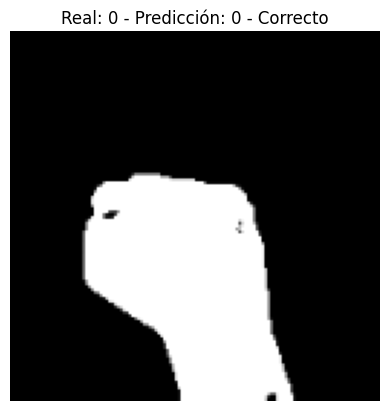

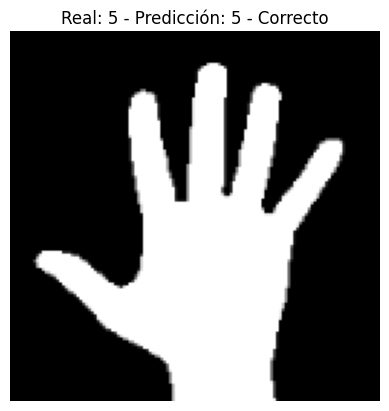

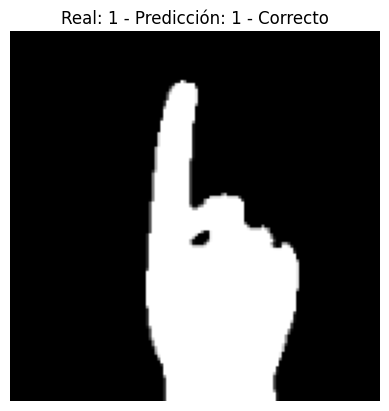

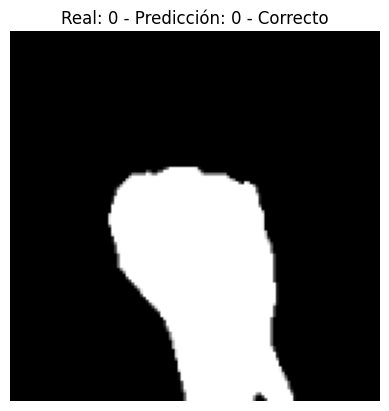

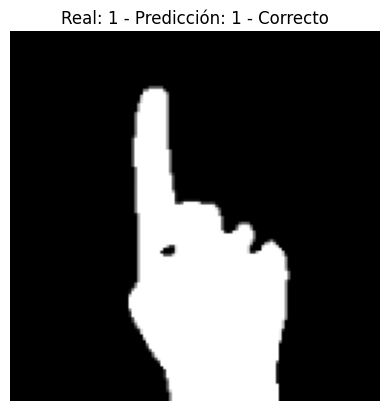

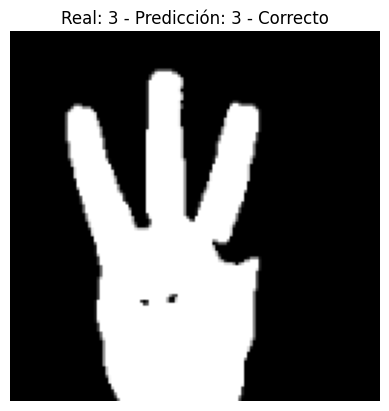

1/1 [==============================] - 0s 41ms/step


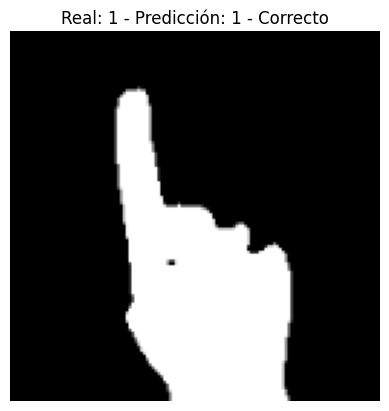

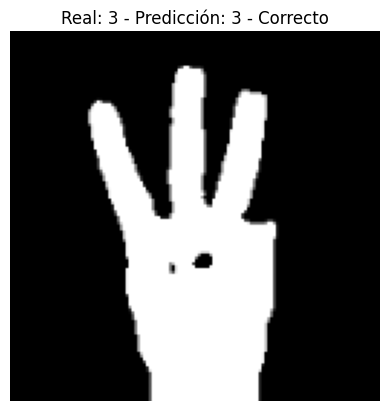

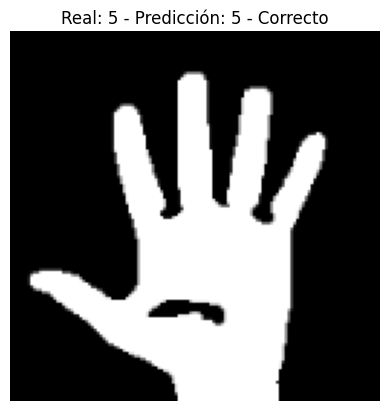

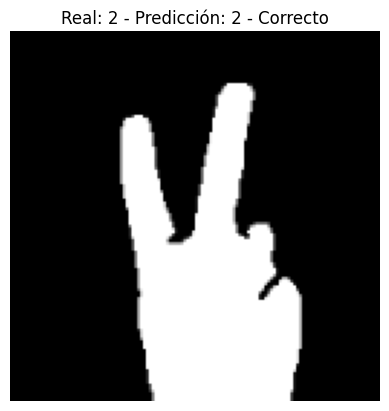

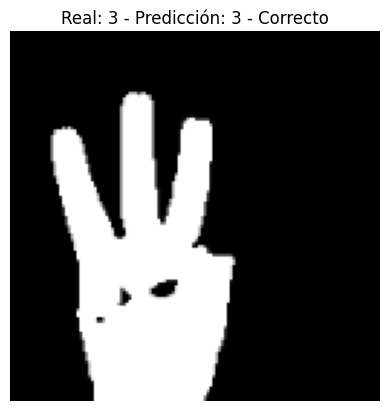

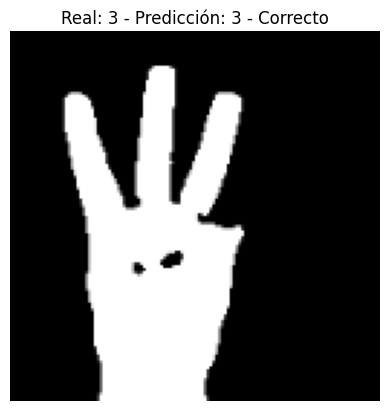

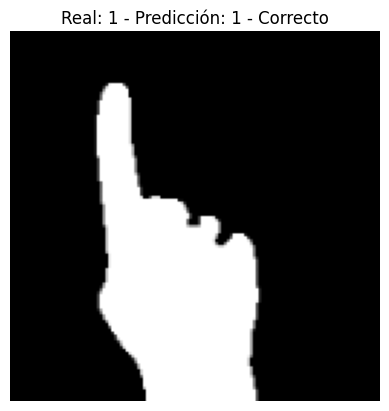

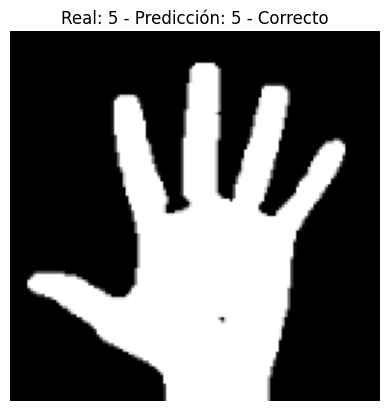

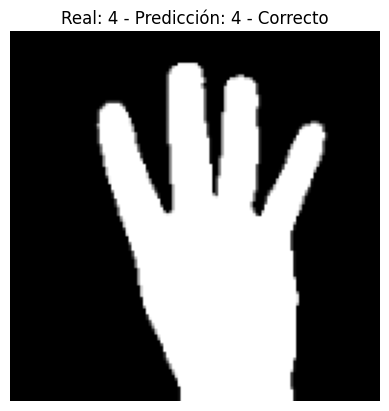

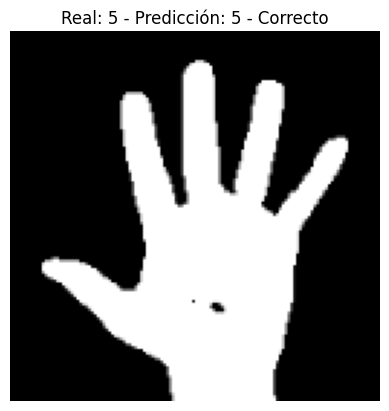

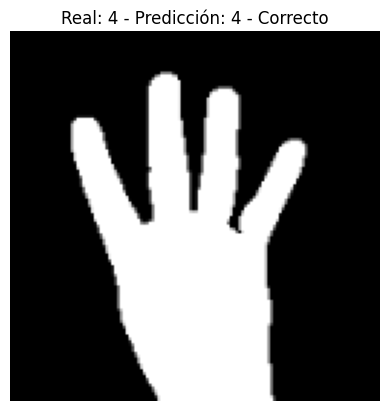

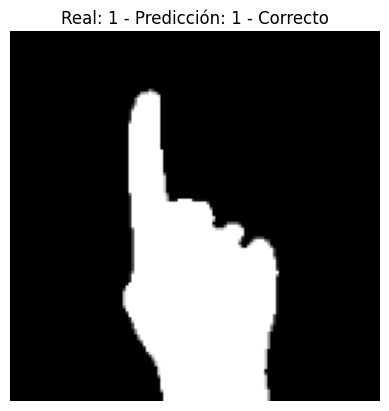

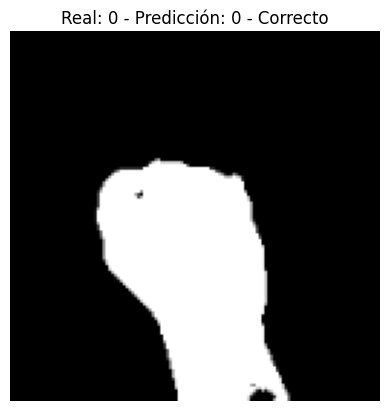

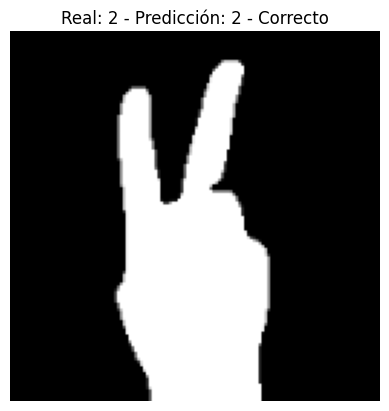

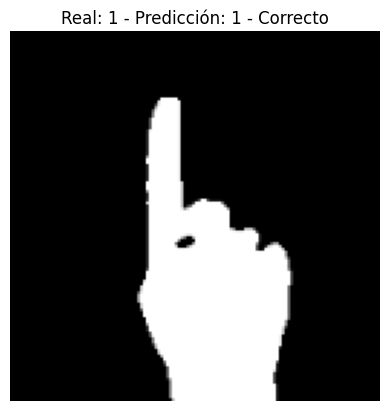

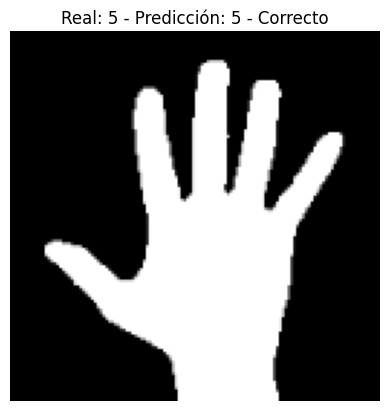

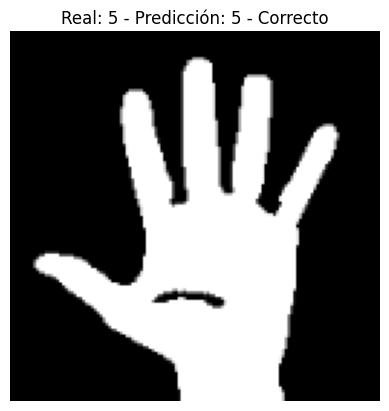

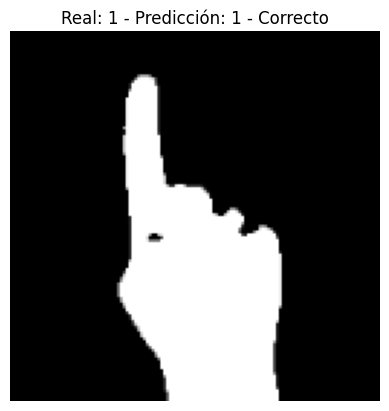

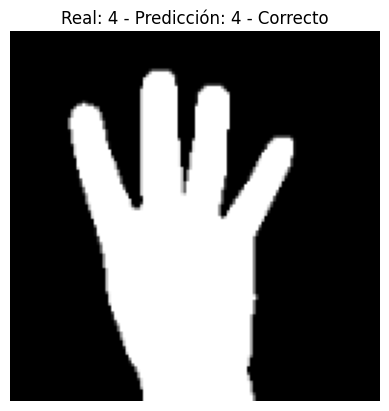

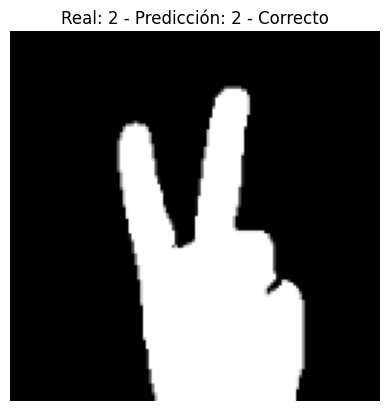

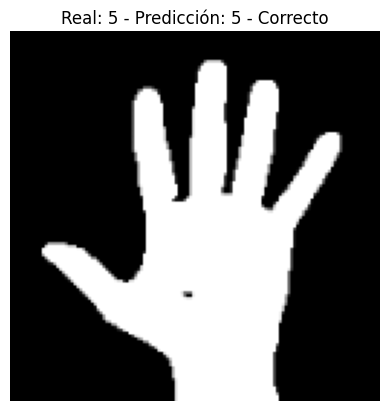

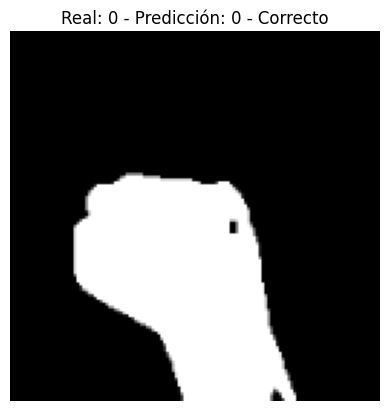

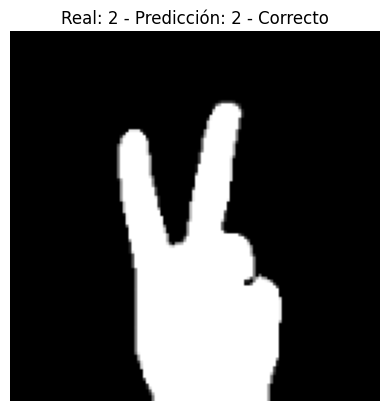

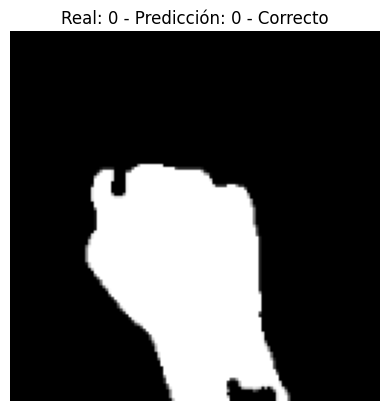

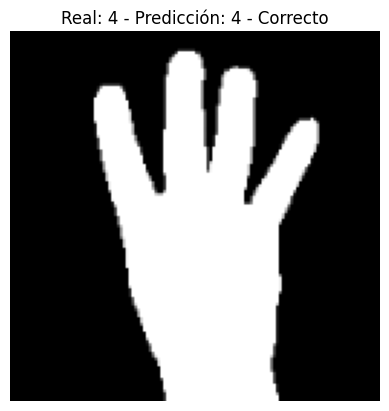

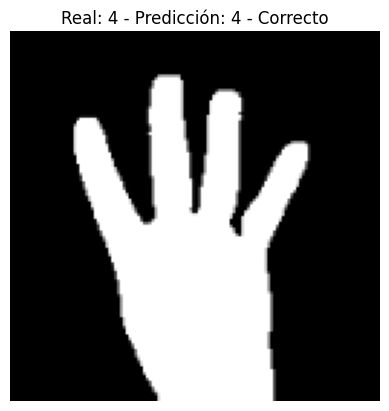

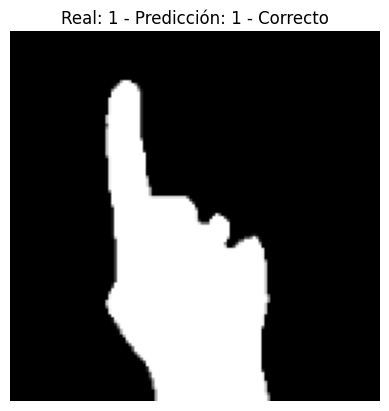

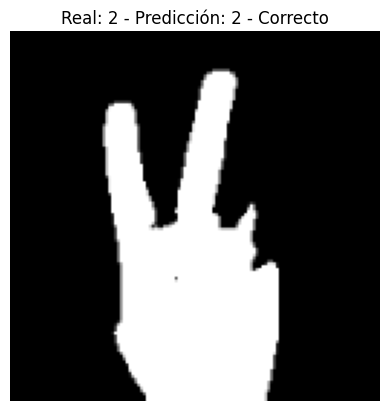

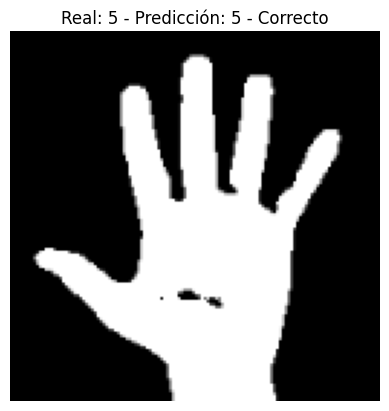

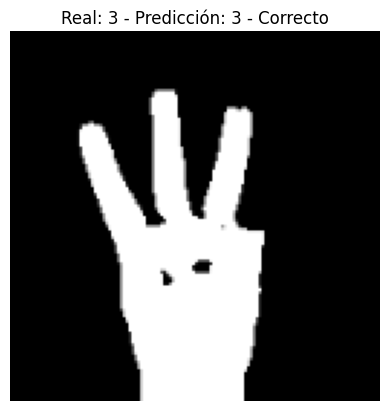

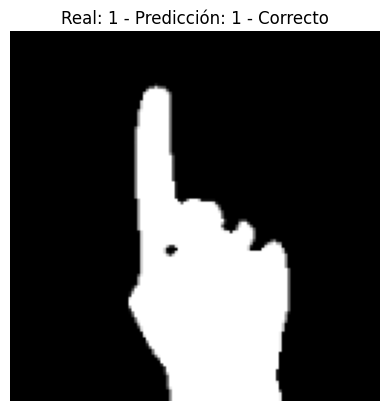

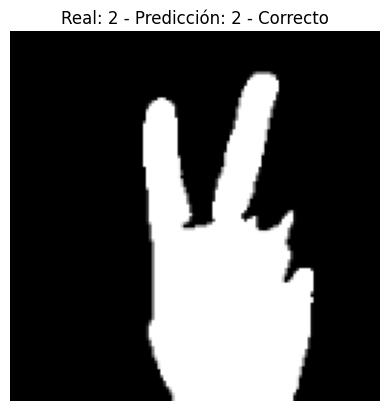

In [ ]:
# Iteramos sobre el conjunto de pruebas para hacer predicciones imagen a imagen
for imagen, etiqueta_real in datos_pruebas.take(10):

    # Realizamos la predicción para la imagen actual
    predicciones = modelo.predict(imagen)

    # Iteramos sobre cada predicción en el lote
    for i in range(predicciones.shape[0]):
        etiqueta_predicha = np.argmax(predicciones[i])

        # Convierte el tensor a un array de NumPy y selecciona una sola imagen
        imagen_np = imagen.numpy()[i, :, :, 0]

        # Mostramos la imagen
        plt.imshow(imagen_np, cmap='gray')
        plt.axis('off')

        # Mostramos valores predichos y reales
        etiqueta_real_np = etiqueta_real.numpy()
        etiqueta_real_int = int(etiqueta_real_np[i]) if etiqueta_real_np.size > 1 else int(etiqueta_real_np)

        # Verificamos si la predicción es incorrecta
        if etiqueta_predicha != etiqueta_real_int:
            plt.title(f'Real: {clases[etiqueta_real_int]} - Predicción: {clases[etiqueta_predicha]} - Incorrecto')
        else:
            plt.title(f'Real: {clases[etiqueta_real_int]} - Predicción: {clases[etiqueta_predicha]} - Correcto')

        plt.show()


# GRACIAS